# Data preparation

First we have a look at the different datasets. With an explorative data analysis we get a overview over the datasets and its quality. For every dataframe there is first a section of coding and at the end a brief summary with the most important findings. 

In [1]:
# Loading libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mticker
import seaborn as sns
from datetime import timedelta
from sklearn.model_selection import train_test_split
from collections import Counter
from datetime import datetime
from prettytable import PrettyTable
from matplotlib.ticker import ScalarFormatter
from scipy.stats import linregress

## 1. Loading, Transforming, and Checking Data Quality via EDA


In [2]:
# Load datasets
account = pd.read_csv('Data/account.csv', delimiter=';')
card = pd.read_csv('Data/card.csv', delimiter=';')
client = pd.read_csv('Data/client.csv', delimiter=';')
disp = pd.read_csv('Data/disp.csv', delimiter=';')
district = pd.read_csv('Data/district.csv', delimiter=';')
loan = pd.read_csv('Data/loan.csv', delimiter=';')
order = pd.read_csv('Data/order.csv', delimiter=';')
trans = pd.read_csv('Data/trans.csv', delimiter=';')

/tmp/ipykernel_15606/3631285392.py:9: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  trans = pd.read_csv('Data/trans.csv', delimiter=';')


### Account

In [3]:
# Getting an overview
print(account.shape)
print(account.info())
print(account.isnull().sum())
account.head()

(4500, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account_id   4500 non-null   int64 
 1   district_id  4500 non-null   int64 
 2   frequency    4500 non-null   object
 3   date         4500 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 140.8+ KB
None
account_id     0
district_id    0
frequency      0
date           0
dtype: int64


,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


In [4]:
account['date'] = pd.to_datetime(account['date'], format='%y%m%d')
account['frequency'].value_counts()

frequency
POPLATEK MESICNE      4167
POPLATEK TYDNE         240
POPLATEK PO OBRATU      93
Name: count, dtype: int64

In [5]:
# Translating the frequency into English
translation_frequency = {
    'POPLATEK MESICNE': 'monthly',
    'POPLATEK TYDNE': 'weekly',
    'POPLATEK PO TRANSAKCI': 'after transaction'
}

account['frequency'] = account['frequency'].map(translation_frequency)
account.head

<bound method NDFrame.head of       account_id  district_id frequency       date
0            576           55   monthly 1993-01-01
1           3818           74   monthly 1993-01-01
2            704           55   monthly 1993-01-01
3           2378           16   monthly 1993-01-01
4           2632           24   monthly 1993-01-02
...          ...          ...       ...        ...
4495         124           55   monthly 1997-12-28
4496        3958           59   monthly 1997-12-28
4497         777           30   monthly 1997-12-28
4498        1573           63   monthly 1997-12-29
4499        3276            1   monthly 1997-12-29

[4500 rows x 4 columns]>

In [6]:
# Checking if there are any data missing
print(account.isnull().sum())

account_id      0
district_id     0
frequency      93
date            0
dtype: int64


In [7]:
# How many unique IDs of accounts are there and how many districts are there
print(account['account_id'].nunique())
print(account['district_id'].nunique())

4500
77


### Clients

In [8]:
# Getting an overview
print(client.shape)
print(client.info())
print(client.isnull().sum())
client.head()

(5369, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   client_id     5369 non-null   int64
 1   birth_number  5369 non-null   int64
 2   district_id   5369 non-null   int64
dtypes: int64(3)
memory usage: 126.0 KB
None
client_id       0
birth_number    0
district_id     0
dtype: int64


,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [9]:
# Function to calculate the birthday, gender and age from birth_number
def calculate_birthday(df):
    
    genders = []
    birthdays = []
    ages = []
    
    base_date = datetime(1999, 12, 31)
    
    for birth_number in df['birth_number']:
        birth_number_str = str(birth_number)
        
        year = int("19" + birth_number_str[:2])
        month = int(birth_number_str[2:4])
        day = int(birth_number_str[4:6])
        
        if month > 12:
            gender = "female"
            month -= 50  # minus 50 for females
        else:
            gender = "male"
        
        birth_day = datetime(year, month, day)
        age = base_date.year - birth_day.year - ((base_date.month, base_date.day) < (birth_day.month, birth_day.day))
        
        genders.append(gender)
        birthdays.append(birth_day)
        ages.append(age)
    
    df['gender'] = genders
    df['birth_date'] = birthdays
    df['age'] = ages
    
    df = df.drop(columns=['birth_number'])
    
    return df

client = calculate_birthday(client)
#client.head

# Verify the result
print(client[['birth_date', 'age', 'gender']].head())

  birth_date  age  gender
0 1970-12-13   29  female
1 1945-02-04   54    male
2 1940-10-09   59  female
3 1956-12-01   43    male
4 1960-07-03   39  female


In [10]:
client.describe()

,client_id,district_id,birth_date,age
count,5369.000000,5369.000000,5369,5369.000000
mean,3359.011920,37.310114,1953-09-12 09:32:21.143602176,45.801639
min,1.000000,1.000000,1911-08-20 00:00:00,12.000000
25%,1418.000000,14.000000,1940-11-25 00:00:00,31.000000
50%,2839.000000,38.000000,1954-05-06 00:00:00,45.000000
75%,4257.000000,60.000000,1968-06-09 00:00:00,59.000000
max,13998.000000,77.000000,1987-09-27 00:00:00,88.000000
std,2832.911984,25.043690,NaN,17.282283


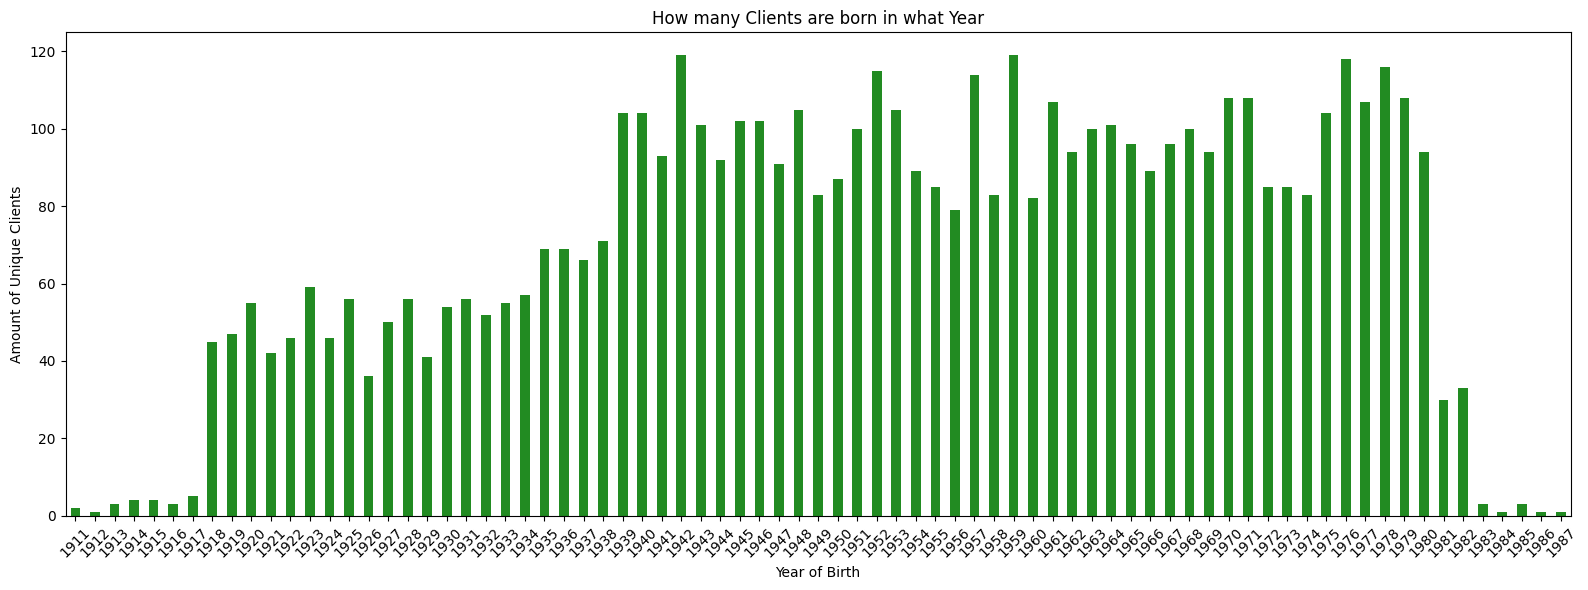

In [11]:
# Plotting the year of birth of the clients

client['birth_year'] = pd.to_datetime(client['birth_date']).dt.year
client_count_per_year = client.groupby('birth_year')['client_id'].nunique()

# Plot
plt.figure(figsize=(16, 6))
client_count_per_year.plot(kind='bar', color = 'forestgreen')
plt.title('How many Clients are born in what Year')
plt.xlabel('Year of Birth')
plt.ylabel('Amount of Unique Clients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

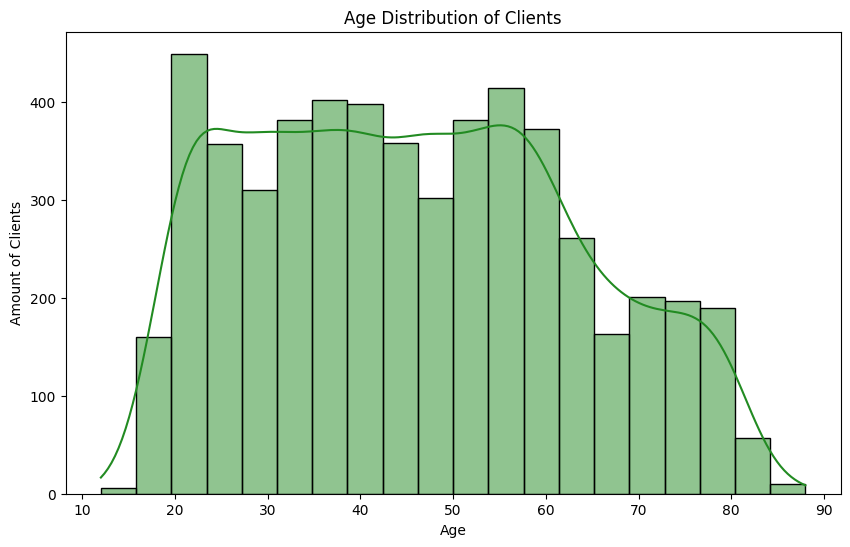

In [12]:
# Visualising the age distribution of the clients
plt.figure(figsize=(10,6))
sns.histplot(client['age'], bins=20, kde=True, color = 'forestgreen')
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Amount of Clients')
plt.show()

/tmp/ipykernel_15606/516249682.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([client[client['gender'] == 'male']['age'], client[client['gender'] == 'female']['age']],


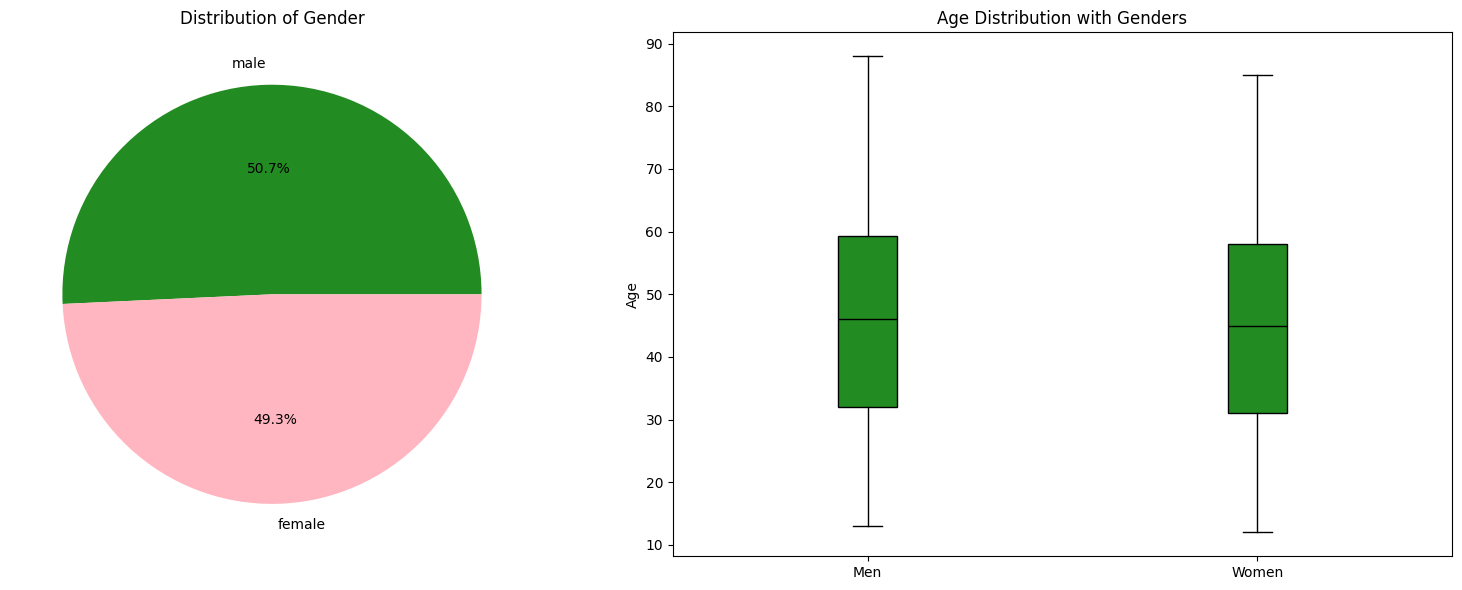

In [13]:
# Having a look at the gender distribution
colors = ['forestgreen', 'lightpink']
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
gender_counts = client['gender'].value_counts()

axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors)
axes[0].set_title('Distribution of Gender')

axes[1].boxplot([client[client['gender'] == 'male']['age'], client[client['gender'] == 'female']['age']],
                labels=['Men', 'Women'], patch_artist=True,
                boxprops=dict(facecolor=colors[0]),  
                medianprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'))
axes[1].set_ylabel('Age')
axes[1].set_title('Age Distribution with Genders')

# Plotting
plt.tight_layout()
plt.show()

Short summary of what we did: 
In this step we added a column for the birthday-date of the costumers and the gender of the costumers. There is a plot which shows in what year how many costumers were born. Also we can see that the gender distribution is equal. We also see that most costumers come from the district Prague which isn't surprising since it's the biggest city in Czech Republic. 

### District

In [14]:
district.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [15]:
# Renaming the columns
new_column_names = ['district_id', 'district_name', 'region', 'inhabitants', 'villages_less_499', 'villages_500_to_1999', 'villages_2000_to_9999', 'villages_with_more_10000', 'number_of_cities', 'ratio_urban_inhabitants', 
                    'average_salary','unemployment_rate_95', 'unemployment_rate_96', 'entrepreneurs_per_1000_inhabitants', 'committed_crimes_95', 'committed_crimes_96']

district.columns = new_column_names

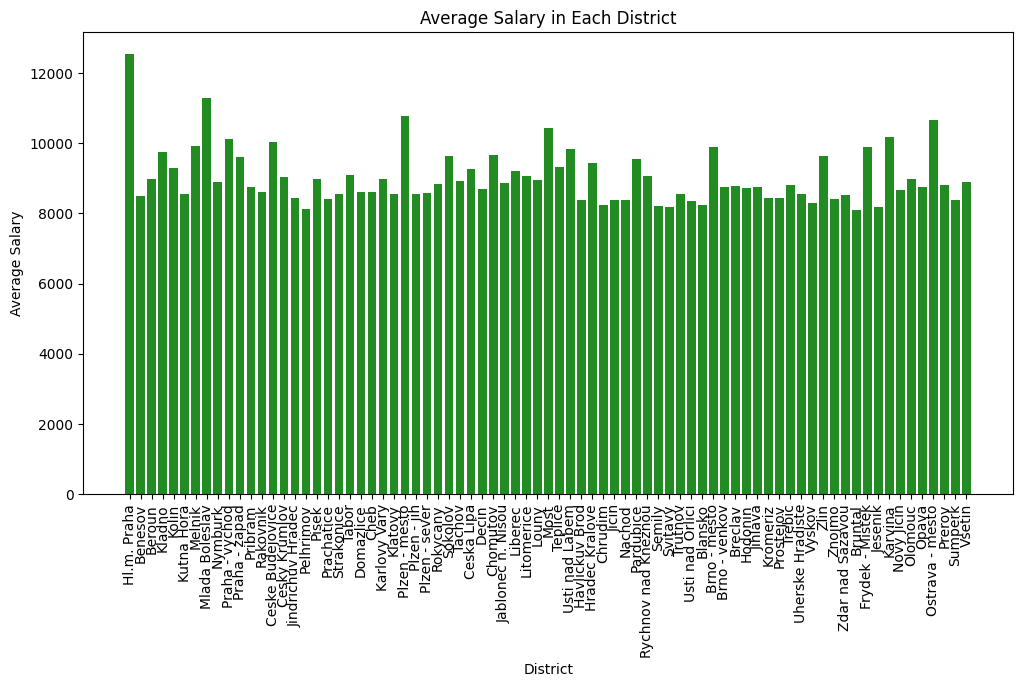

In [16]:
# What is the average salary in each district
plt.figure(figsize=(12, 6))
plt.bar(district['district_name'], district['average_salary'], color='forestgreen')
plt.xlabel("District")
plt.ylabel("Average Salary")
plt.title("Average Salary in Each District")
plt.xticks(rotation=90)
plt.show()

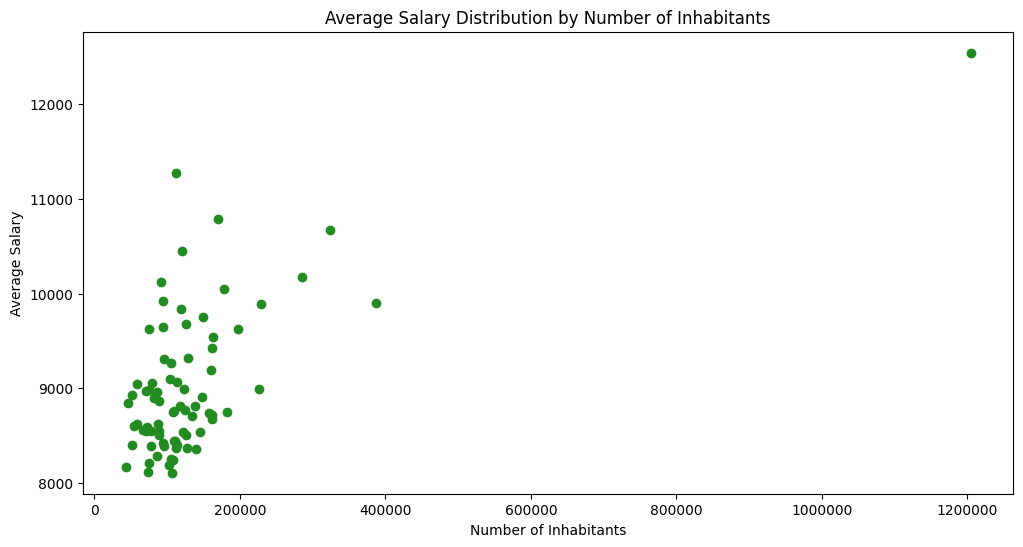

In [17]:
# Average salary depending for every district depending on the amount of inhabitants
plt.figure(figsize=(12, 6))
plt.scatter(district['inhabitants'], district['average_salary'], color='forestgreen')
plt.xlabel("Number of Inhabitants")
plt.ylabel("Average Salary")
plt.title("Average Salary Distribution by Number of Inhabitants")
ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.ticklabel_format(style='plain', axis='x')  
plt.show()

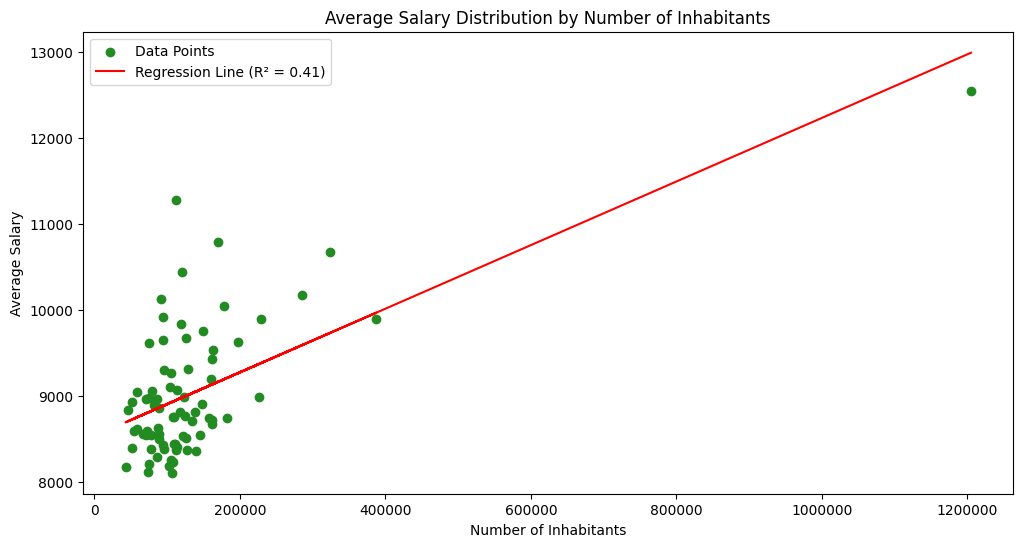

In [18]:
# The same plot but with a regression line
x = district['inhabitants']
y = district['average_salary']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='forestgreen', label='Data Points')
plt.plot(x, regression_line, color='red', label=f'Regression Line (R² = {r_value**2:.2f})')
plt.xlabel("Number of Inhabitants")
plt.ylabel("Average Salary")
plt.title("Average Salary Distribution by Number of Inhabitants")
ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.ticklabel_format(style='plain', axis='x')
plt.legend()
plt.show()

That one dot might be an outliner. So let's check if there are more outliners and see if the R2 improves if we ignore them. 

In [19]:
# Stats
median_salary = np.median(y)
average_salary = np.mean(y)
min_salary = np.min(y)
max_salary = np.max(y)

print("Statistics for Average Salary:")
print(f"Median Salary: {median_salary:.2f}")
print(f"Average Salary: {average_salary:.2f}")
print(f"Minimum Salary: {min_salary:.2f}")
print(f"Maximum Salary: {max_salary:.2f}")
print(f"R² (Coefficient of Determination): {r_value**2:.2f}")

Statistics for Average Salary:
Median Salary: 8814.00
Average Salary: 9031.68
Minimum Salary: 8110.00
Maximum Salary: 12541.00
R² (Coefficient of Determination): 0.41


In [20]:
# Identifying outliners
data = district['average_salary']

Q1 = np.percentile(data, 25)  
Q3 = np.percentile(data, 75)  
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data < lower_bound) | (data > upper_bound)]
print("Outliers:")
print(outliers)

Outliers:
0     12541
7     11277
25    10787
73    10673
Name: average_salary, dtype: int64


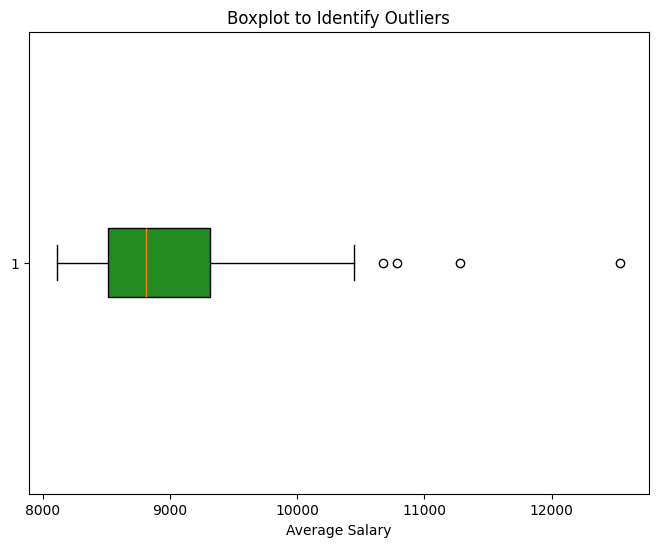

In [21]:
# Boxplot to identify outliers
plt.figure(figsize=(8, 6))
plt.boxplot(data, vert=False, patch_artist=True, boxprops=dict(facecolor='forestgreen', color='black'))
plt.title("Boxplot to Identify Outliers")
plt.xlabel("Average Salary")
plt.show()

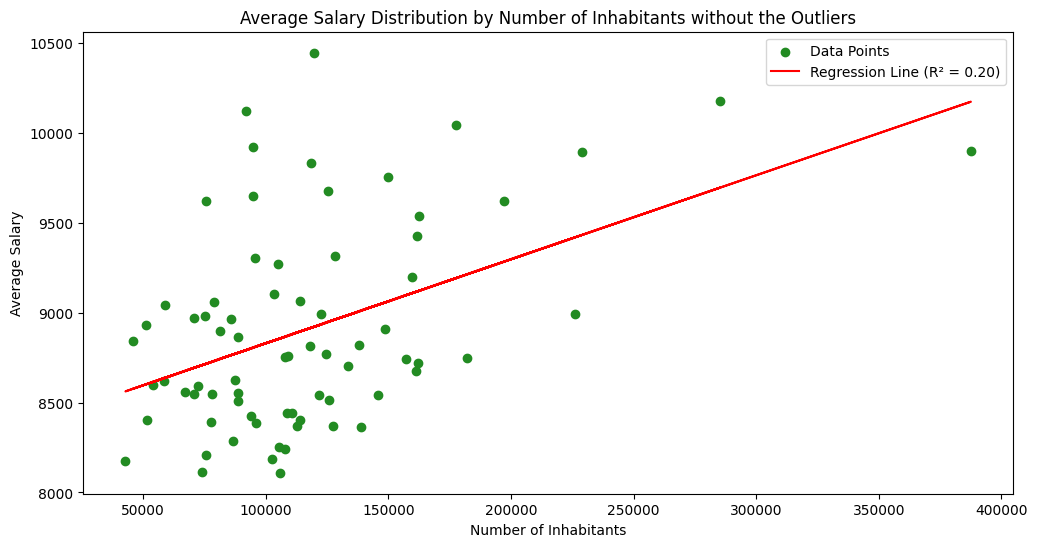

R²: 0.20


In [22]:
# Plot without the outliners
data = district['average_salary']
inhabitants = district['inhabitants']

Q1 = np.percentile(data, 25)  
Q3 = np.percentile(data, 75) 
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = district[(data >= lower_bound) & (data <= upper_bound)]

x = filtered_data['inhabitants']
y = filtered_data['average_salary']

slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='forestgreen', label='Data Points')
plt.plot(x, regression_line, color='red', label=f'Regression Line (R² = {r_value**2:.2f})')
plt.xlabel("Number of Inhabitants")
plt.ylabel("Average Salary")
plt.title("Average Salary Distribution by Number of Inhabitants without the Outliers")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.ScalarFormatter(useOffset=False))
plt.ticklabel_format(style='plain', axis='x') 
plt.legend()
plt.show()
print(f"R²: {r_value**2:.2f}")

Hm, the R**2 got worse. Let's analyse the outliners. 

In [23]:
outliers = district[(data < lower_bound) | (data > upper_bound)]
print(outliers)

    district_id    district_name           region  inhabitants  \
0             1      Hl.m. Praha           Prague      1204953   
7             8   Mlada Boleslav  central Bohemia       112065   
25           26    Plzen - mesto     west Bohemia       170449   
73           74  Ostrava - mesto    north Moravia       323870   

    villages_less_499  villages_500_to_1999  villages_2000_to_9999  \
0                   0                     0                      0   
7                  95                    19                      7   
25                  0                     0                      0   
73                  0                     0                      0   

    villages_with_more_10000  number_of_cities  ratio_urban_inhabitants  \
0                          1                 1                    100.0   
7                          1                 8                     69.4   
25                         1                 1                    100.0   
73                

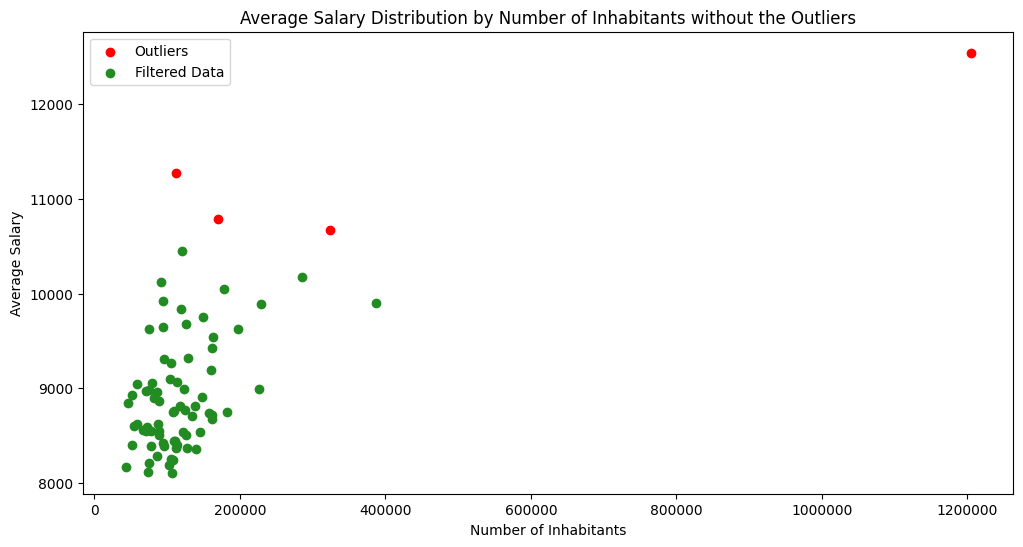

In [24]:
# Marking the outliners
plt.figure(figsize=(12, 6))
plt.scatter(outliers['inhabitants'], outliers['average_salary'], color='red', label='Outliers')
plt.scatter(filtered_data['inhabitants'], filtered_data['average_salary'], color='forestgreen', label='Filtered Data')
plt.xlabel("Number of Inhabitants")
plt.ylabel("Average Salary")
plt.title("Average Salary Distribution by Number of Inhabitants without the Outliers")
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='x')  # Ensures plain formatting for x-axis

plt.legend()
plt.show()

Mean of Residuals: -0.00
Standard Deviation of Residuals: 502.49


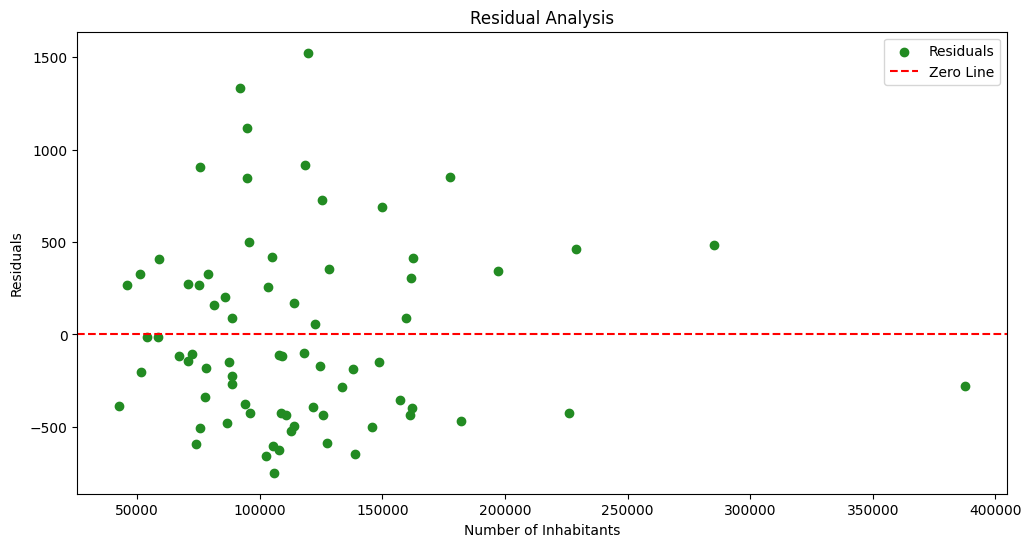

In [25]:
# Calculating the residuals
x = filtered_data['inhabitants']
y = filtered_data['average_salary']

slope, intercept, _, _, _ = linregress(x, y)
y_pred = slope * x + intercept  
residuals = y - y_pred

print(f"Mean of Residuals: {np.mean(residuals):.2f}")
print(f"Standard Deviation of Residuals: {np.std(residuals):.2f}")

plt.figure(figsize=(12, 6))
plt.scatter(x, residuals, color='forestgreen', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Line') 
plt.xlabel("Number of Inhabitants")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.legend()
plt.show()

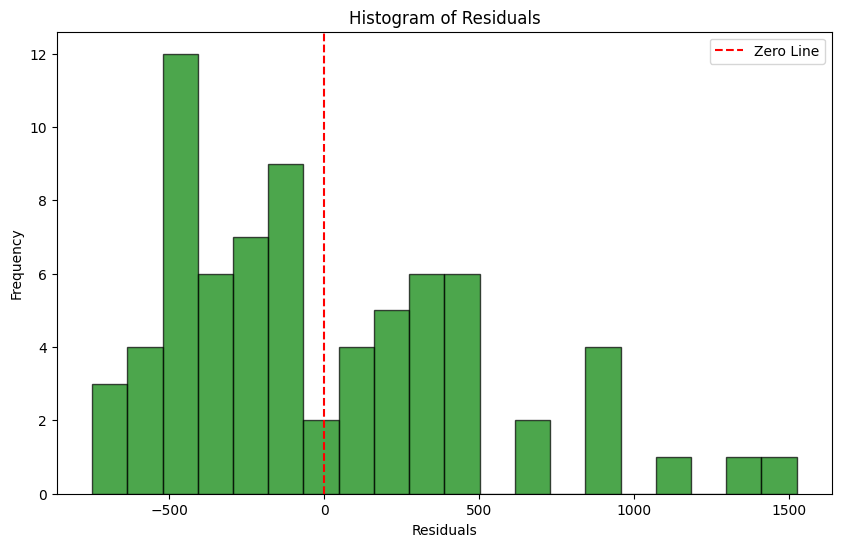

In [26]:
# Histogram for the residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='green', edgecolor='black', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', label='Zero Line')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.legend()
plt.show()

Conclusion: There are some outliers, we need to keep that in mind for the model. 

# Error

In [27]:
# Check how many unique clients are there per district in the whole dataset

#data_client_district = client.merge(district, left_on='district_id', right_on='district_name', how='left')
#district_counts = data_client_district.groupby('district_name')['client_id'].nunique().reset_index(name='unique_client_count')
#district_counts = district_counts.rename(columns={'district_name': 'District'})

# Plot
#plt.figure(figsize=(12, 6))
#plt.bar(district_counts['District'], district_counts['unique_client_count'], color='forestgreen')
#plt.xlabel("District")
#plt.ylabel("Number of Unique Clients")
#plt.title("All Unique Clients per District")
#plt.xticks(rotation=90)
#plt.show()

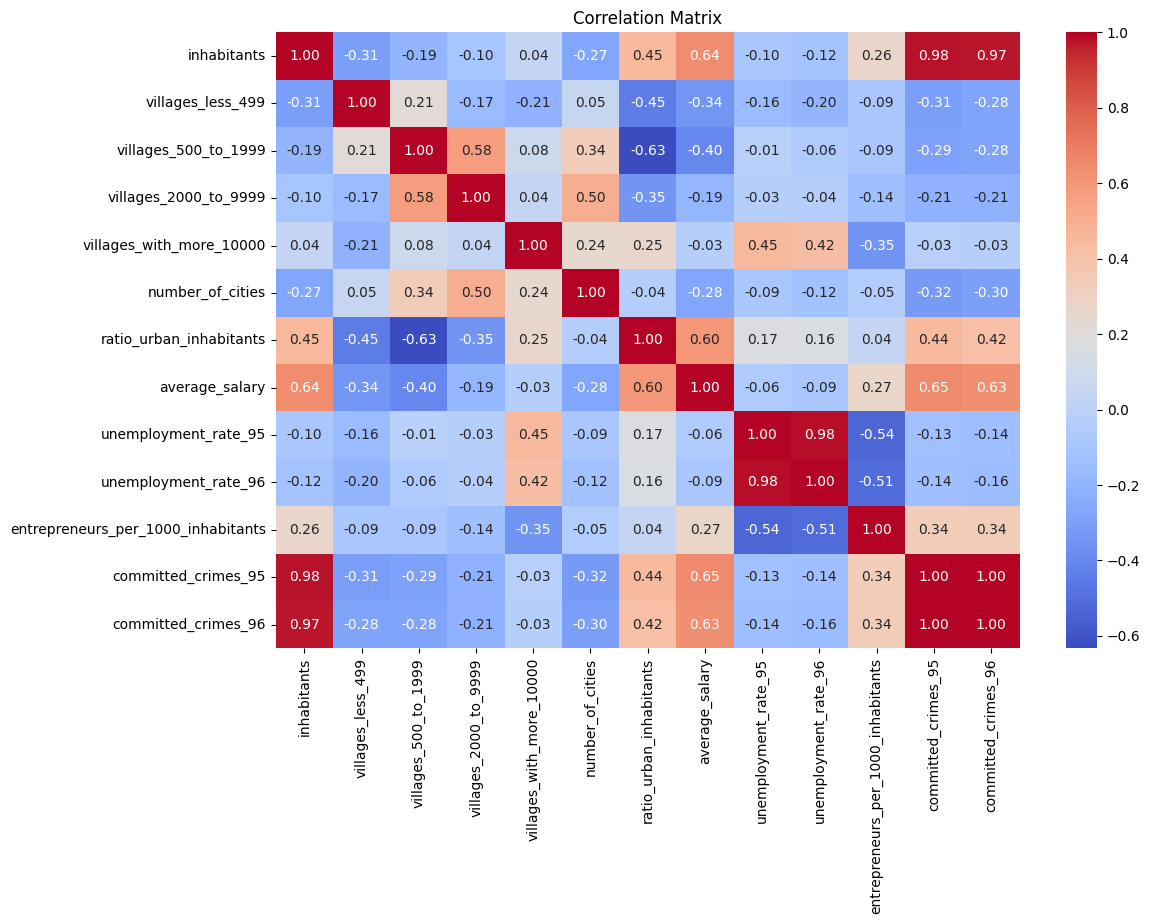

In [28]:
# Correlation matrix
numeric_columns = ['inhabitants', 'villages_less_499', 'villages_500_to_1999', 'villages_2000_to_9999', 
                   'villages_with_more_10000', 'number_of_cities', 'ratio_urban_inhabitants', 
                   'average_salary', 'unemployment_rate_95', 'unemployment_rate_96', 
                   'entrepreneurs_per_1000_inhabitants', 'committed_crimes_95', 'committed_crimes_96']

district[numeric_columns] = district[numeric_columns].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(12, 8))
correlation_matrix = district[['inhabitants', 'villages_less_499', 'villages_500_to_1999', 'villages_2000_to_9999', 'villages_with_more_10000', 'number_of_cities', 'ratio_urban_inhabitants', 
                    'average_salary','unemployment_rate_95', 'unemployment_rate_96', 'entrepreneurs_per_1000_inhabitants', 'committed_crimes_95', 'committed_crimes_96']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

/home/nikodem/miniconda3/envs/AI/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/home/nikodem/miniconda3/envs/AI/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/home/nikodem/miniconda3/envs/AI/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/home/nikodem/miniconda3/envs/AI/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.


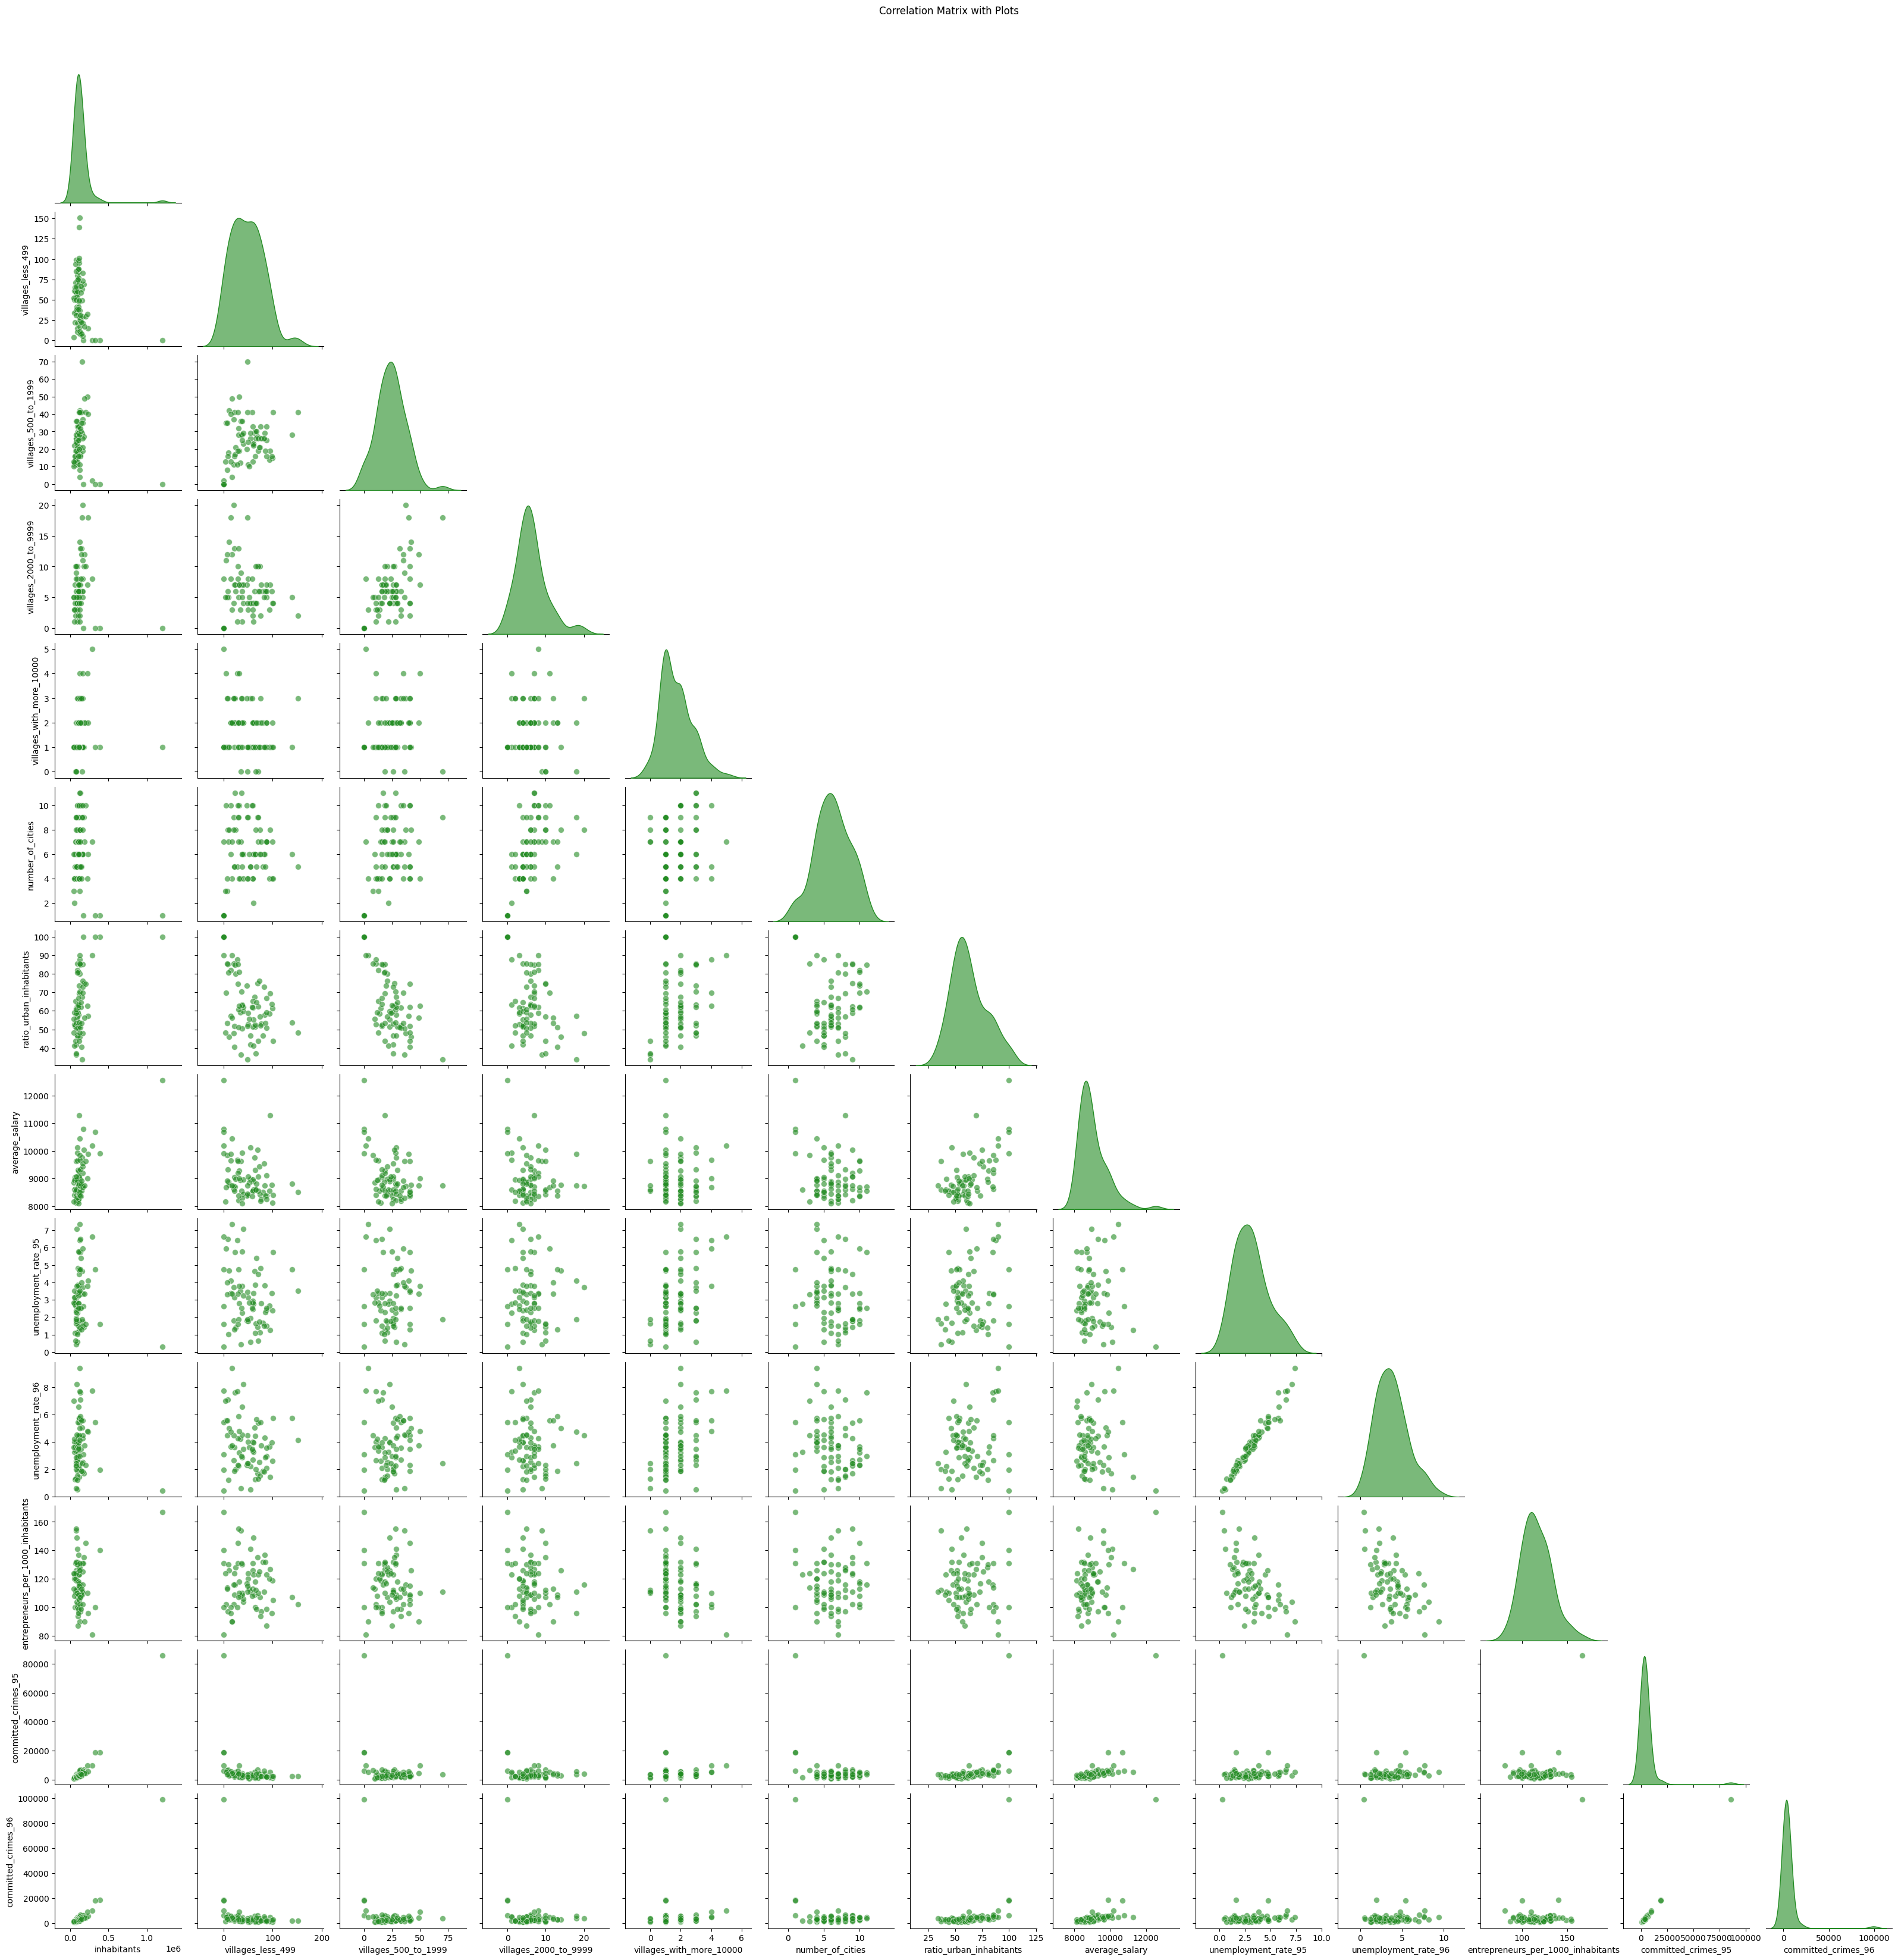

In [29]:
# Different correlation matrix
columns = ['inhabitants', 'villages_less_499', 'villages_500_to_1999', 'villages_2000_to_9999', 
           'villages_with_more_10000', 'number_of_cities', 'ratio_urban_inhabitants', 
           'average_salary', 'unemployment_rate_95', 'unemployment_rate_96', 
           'entrepreneurs_per_1000_inhabitants', 'committed_crimes_95', 'committed_crimes_96']

# Plot
sns.pairplot(district[columns], diag_kind='kde', corner=True,
             plot_kws={'alpha': 0.6, 's': 50, 'color': 'forestgreen'},  
             diag_kws={'shade': True, 'alpha': 0.6, 'color': 'forestgreen'}) 
plt.suptitle("Correlation Matrix with Plots", y=1.02)  
plt.show()

### Dispositions

In [30]:
# Getting an overview
print(disp.shape)
print(disp.info())
print(disp.isnull().sum())
disp.head()

(5369, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   disp_id     5369 non-null   int64 
 1   client_id   5369 non-null   int64 
 2   account_id  5369 non-null   int64 
 3   type        5369 non-null   object
dtypes: int64(3), object(1)
memory usage: 167.9+ KB
None
disp_id       0
client_id     0
account_id    0
type          0
dtype: int64


,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [ ]:
# See how many types there are and the amount of each
disp['type'].value_counts()

type
OWNER        4500
DISPONENT     869
Name: count, dtype: int64

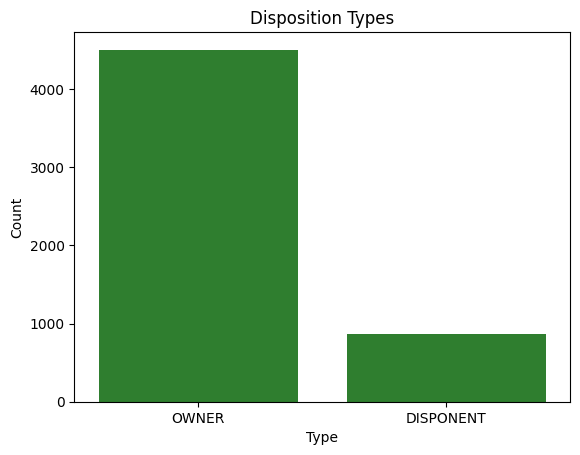

In [32]:
# See how many are owners and how many are disponents
sns.countplot(data=disp, x='type', color = 'forestgreen')
plt.title('Disposition Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [33]:
# Checking if one account can have more than one client

multiple_clients_per_account = disp.groupby(['account_id'])['client_id'].nunique().reset_index(name='unique_clients')
multiple_clients_per_account = multiple_clients_per_account[multiple_clients_per_account['unique_clients'] > 1]
print(multiple_clients_per_account)

# Here is a list with which accounts have an owner and a disponent

      account_id  unique_clients
1              2               2
2              3               2
7              8               2
11            12               2
12            13               2
...          ...             ...
4464       10940               2
4466       10954               2
4479       11111               2
4484       11186               2
4496       11349               2

[869 rows x 2 columns]


In [34]:
# Checking if one client has more than one account
multiple_accounts_per_client = disp.groupby('client_id')['account_id'].nunique().reset_index(name='unique_accounts')
multiple_accounts_per_client = multiple_accounts_per_client[multiple_accounts_per_client['unique_accounts'] > 1]
print(multiple_accounts_per_client)

Empty DataFrame
Columns: [client_id, unique_accounts]
Index: []


Some accounts have two unique clients (with unique client IDs) so some of them have an owner and a disponent. But no client has more than one account. 

### Transactions

In [35]:
# Getting an overview
print(trans.shape)
print(trans.info())
print(trans.isnull().sum())
trans.head()

(1056320, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   trans_id    1056320 non-null  int64  
 1   account_id  1056320 non-null  int64  
 2   date        1056320 non-null  int64  
 3   type        1056320 non-null  object 
 4   operation   873206 non-null   object 
 5   amount      1056320 non-null  float64
 6   balance     1056320 non-null  float64
 7   k_symbol    574439 non-null   object 
 8   bank        273508 non-null   object 
 9   account     295389 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 80.6+ MB
None
trans_id           0
account_id         0
date               0
type               0
operation     183114
amount             0
balance            0
k_symbol      481881
bank          782812
account       760931
dtype: int64


,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


In [36]:
# Fix the the format in date and see how many there are of each 
trans['date'] = pd.to_datetime(trans['date'], format='%y%m%d')
trans['type'].value_counts()

type
VYDAJ     634571
PRIJEM    405083
VYBER      16666
Name: count, dtype: int64

In [37]:
# Renaming column operation into English
translations = {
    "VYBER KARTOU": "credit_card_withdrawal",
    "VKLAD": "credit_in_cash",
    "PREVOD Z UCTU": "collection_from_other_bank",
    "VYBER": "withdrawal_cash",
    "PREVOD NA UCET": "remittance_to_other_bank"
}

trans['operation'] = trans['operation'].map(translations)
#print(trans.head())

In [38]:
# Renaming column type into English
translations = {
    "PRIJEM": "credit",
    "VYDAJ": "withdrawal"
}

trans['type'] = trans['type'].map(translations)
#print(trans.head())

In [39]:
# Renaming column k-symbol into English. Service is defined as hairdresser or other services. Sanction interest is only if the balance is negative.
translations = {
    "POJISTNE": "insurrance_payment",
    "SLUZBY": "service", 
    "UROK":"interest_credited",
    "SANKC. UROK": "sanction_interest",
    "SIPO": "household",
    "DUCHOD": "pension",
    "UVER": "loan_payment"
}

trans['k_symbol'] = trans['k_symbol'].map(translations)
#print(trans.head)

In [40]:
# Renaming k-symbol into transaction_type
trans = trans.rename(columns={'k_symbol': 'transaction_type'})

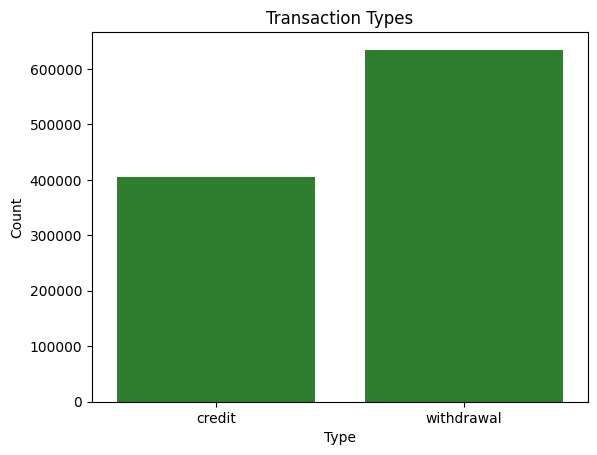

In [41]:
# Visualising the transaction types 
sns.countplot(data=trans, x='type', color = 'forestgreen')
plt.title('Transaction Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

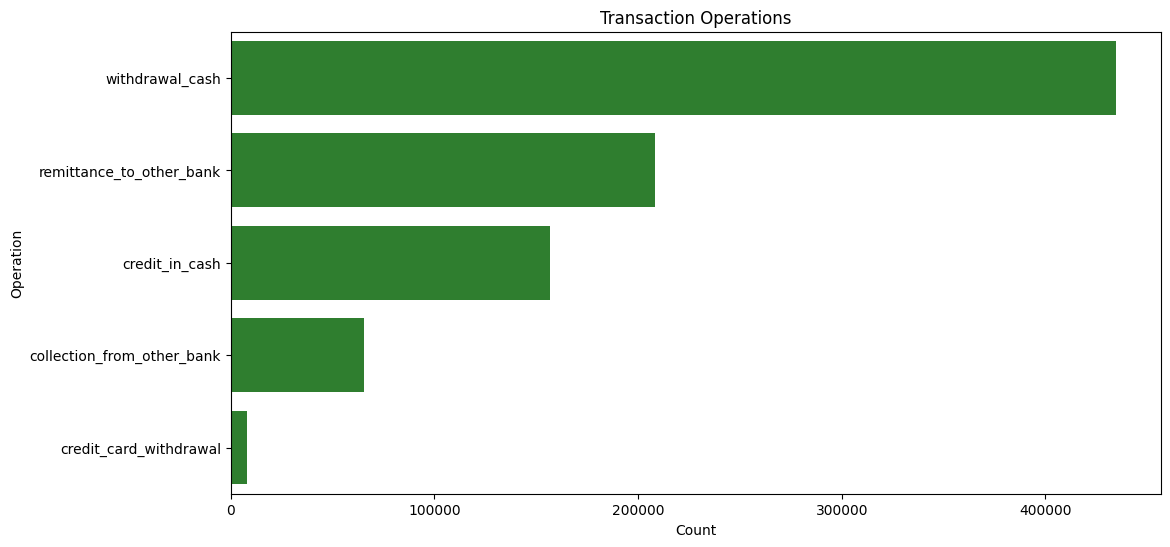

In [42]:
# Visualising the transaction operations
trans['operation'].value_counts()

plt.figure(figsize=(12,6))
sns.countplot(data=trans, y='operation', order=trans['operation'].value_counts().index, color = 'forestgreen')
plt.title('Transaction Operations')
plt.xlabel('Count')
plt.ylabel('Operation')
plt.show()

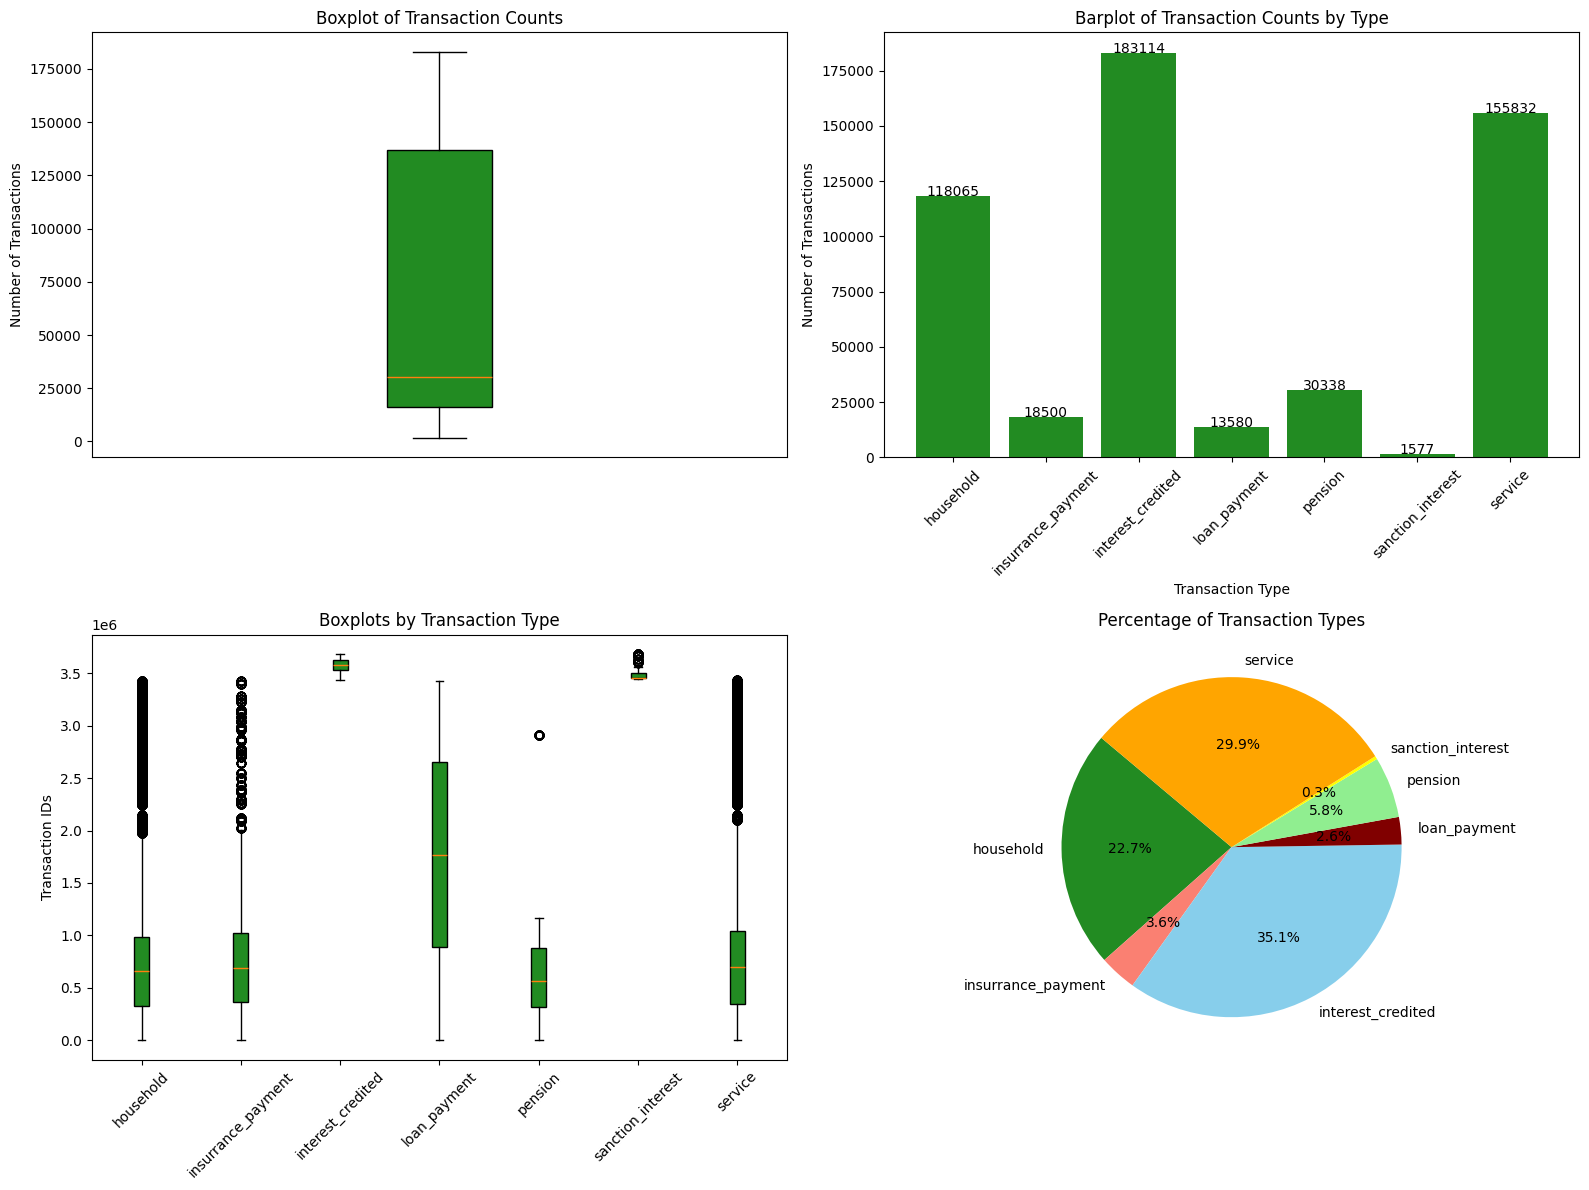

In [43]:
# How many transactions do the clients have in average?
transaction_counts = trans.groupby('transaction_type')['trans_id'].count().reset_index(name='transaction_count')

# Plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12), facecolor='white')
axes[0, 0].boxplot(transaction_counts['transaction_count'], patch_artist=True, boxprops=dict(facecolor='forestgreen', color='black'))
axes[0, 0].set_title("Boxplot of Transaction Counts")
axes[0, 0].set_ylabel("Number of Transactions")
axes[0, 0].set_xticks([])  # Entfernt die x-Achsenbeschriftung im Boxplot
bars = axes[0, 1].bar(transaction_counts['transaction_type'], transaction_counts['transaction_count'], color='forestgreen')
axes[0, 1].set_title("Barplot of Transaction Counts by Type")
axes[0, 1].set_xlabel("Transaction Type")
axes[0, 1].set_ylabel("Number of Transactions")
axes[0, 1].tick_params(axis='x', rotation=45)  # Rotiert die x-Achsenbeschriftungen, falls nötig

for bar in bars:
    axes[0, 1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
                    str(bar.get_height()), ha='center', fontsize=10)
for idx, transaction_type in enumerate(transaction_counts['transaction_type']):
    subset = trans[trans['transaction_type'] == transaction_type]
    axes[1, 0].boxplot(subset['trans_id'], positions=[idx], patch_artist=True, 
                        boxprops=dict(facecolor='forestgreen', color='black'))
axes[1, 0].set_title("Boxplots by Transaction Type")
axes[1, 0].set_xticks(range(len(transaction_counts['transaction_type'])))
axes[1, 0].set_xticklabels(transaction_counts['transaction_type'], rotation=45)
axes[1, 0].set_ylabel("Transaction IDs")
axes[1, 1].pie(
    transaction_counts['transaction_count'],
    labels=transaction_counts['transaction_type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['forestgreen', 'salmon', 'skyblue', 'maroon', 'lightgreen', 'yellow', 'orange'] * len(transaction_counts)
)
axes[1, 1].set_title("Percentage of Transaction Types")

plt.tight_layout()
plt.show()

# Zobacz tutaj
Dlaczego focus na 99th percentile? Takie rzeczy bedzie sie Dani pytal i dlatego musimy to jako #comment napisac. 

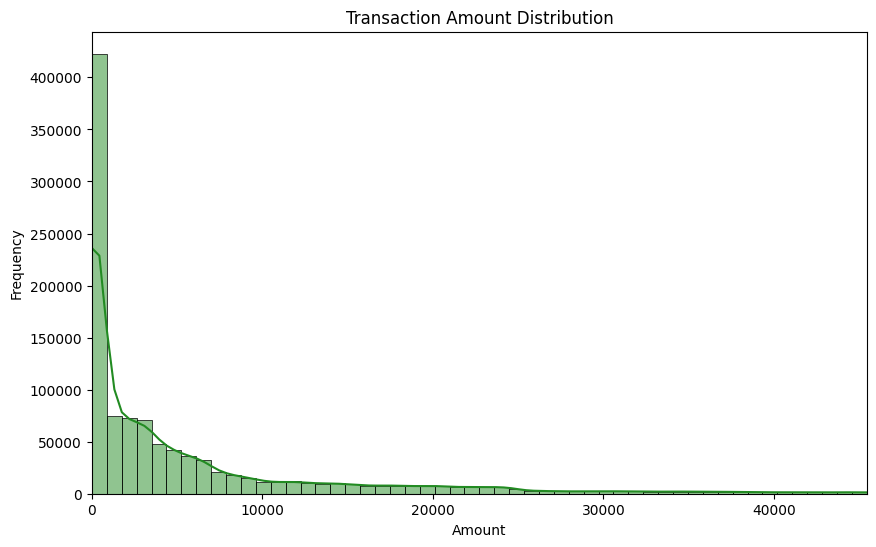

In [44]:
# See how much money is being transacted in each transaction
plt.figure(figsize=(10,6))
sns.histplot(trans['amount'], bins=100, kde=True, color = 'forestgreen')
plt.title('Transaction Amount Distribution') # potrzebny inny tytul
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xlim(0, trans['amount'].quantile(0.99))  # Focus on the 99th percentile
plt.show()

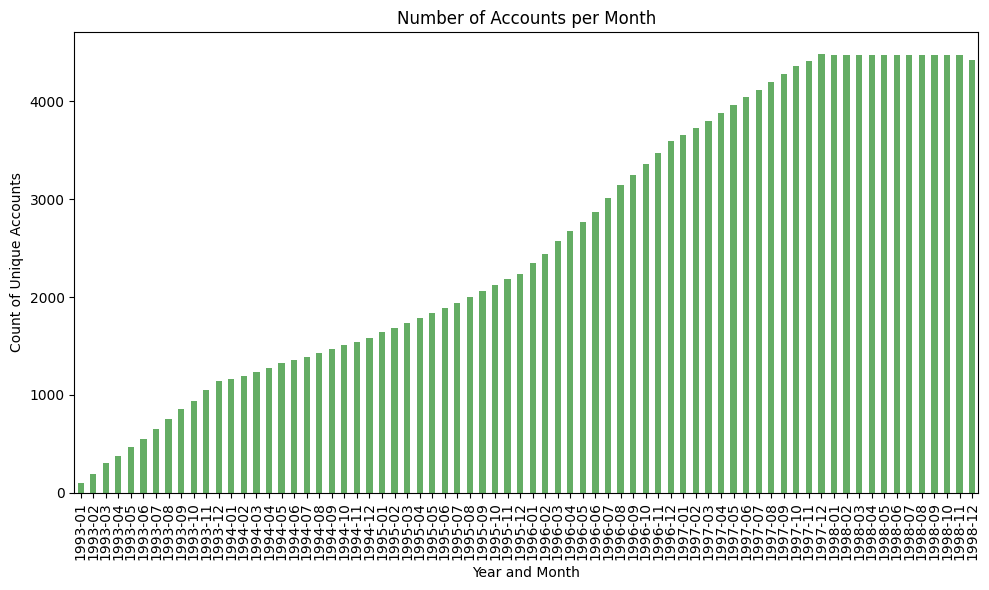

In [45]:
# When was the first transaction meaning when did the clients open their account?
trans['first_transaction_year_month'] = trans['date'].dt.to_period('M')
accounts_per_month = trans.groupby('first_transaction_year_month')['account_id'].nunique()

# Plot
plt.figure(figsize=(10, 6))
accounts_per_month.plot(kind='bar', color='forestgreen', alpha=0.7)
plt.title('Number of Accounts per Month')
plt.xlabel('Year and Month')
plt.ylabel('Count of Unique Accounts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Loan

In [46]:
# Getting an overview
print(loan.shape)
print(loan.info())
print(loan.isnull().sum())
loan.head()

(682, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   loan_id     682 non-null    int64  
 1   account_id  682 non-null    int64  
 2   date        682 non-null    int64  
 3   amount      682 non-null    int64  
 4   duration    682 non-null    int64  
 5   payments    682 non-null    float64
 6   status      682 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 37.4+ KB
None
loan_id       0
account_id    0
date          0
amount        0
duration      0
payments      0
status        0
dtype: int64


,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A


In [ ]:
# Correcting the format and see the types of status
loan['date'] = pd.to_datetime(loan['date'], format='%y%m%d')
loan['status'].value_counts()

status
C    403
A    203
D     45
B     31
Name: count, dtype: int64

In [48]:
# Changing payment status into words
status_mapping = {
    'A': 'contract finished, no problems',
    'B': 'contract finished, loan not payed',
    'C': 'running contract, OK so far',
    'D': 'running contract, client in debt'
}

# Anwenden des Mappings auf die Spalte 'status'
loan['status'] = loan['status'].map(status_mapping)
loan.head

<bound method NDFrame.head of      loan_id  account_id       date  amount  duration  payments  \
0       5314        1787 1993-07-05   96396        12    8033.0   
1       5316        1801 1993-07-11  165960        36    4610.0   
2       6863        9188 1993-07-28  127080        60    2118.0   
3       5325        1843 1993-08-03  105804        36    2939.0   
4       7240       11013 1993-09-06  274740        60    4579.0   
..       ...         ...        ...     ...       ...       ...   
677     4989         105 1998-12-05  352704        48    7348.0   
678     5221        1284 1998-12-05   52512        12    4376.0   
679     6402        6922 1998-12-06  139488        24    5812.0   
680     5346        1928 1998-12-06   55632        24    2318.0   
681     6748        8645 1998-12-08  240900        60    4015.0   

                                status  
0    contract finished, loan not payed  
1       contract finished, no problems  
2       contract finished, no problems  
3

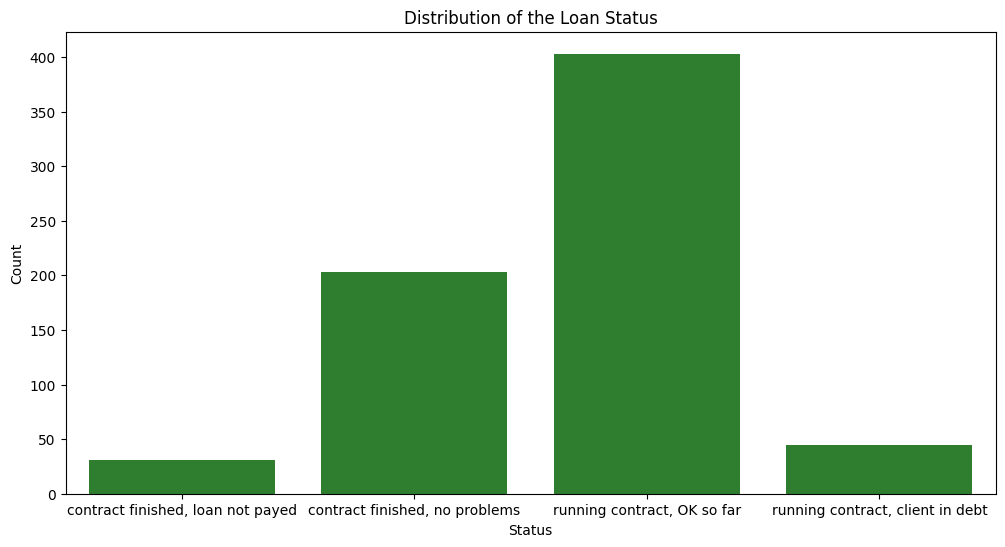

In [49]:
# Visualising the kinds of loan status
plt.figure(figsize=(12,6))
sns.countplot(data=loan, x='status', color = 'forestgreen')
plt.title('Distribution of the Loan Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

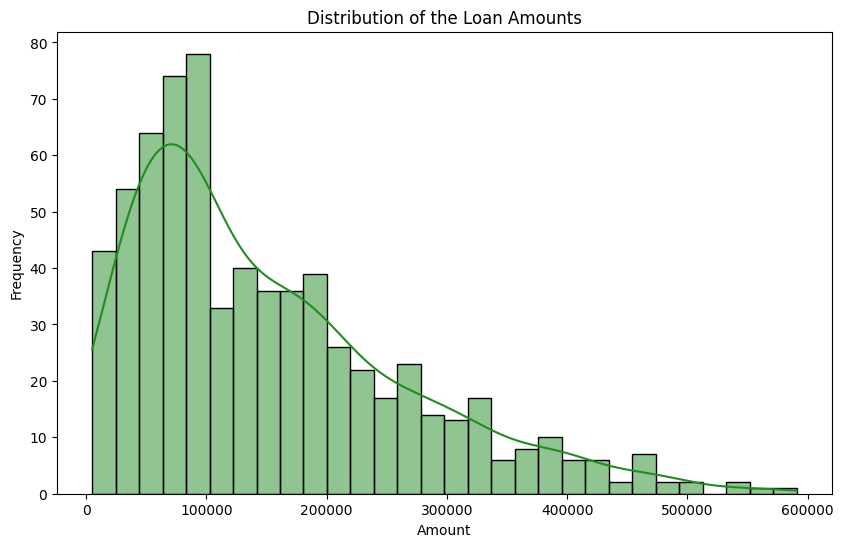

In [50]:
# Checking how much the loans are and how the distribution looks
plt.figure(figsize=(10,6))
sns.histplot(loan['amount'], bins=30, kde=True, color = 'forestgreen')
plt.title('Distribution of the Loan Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

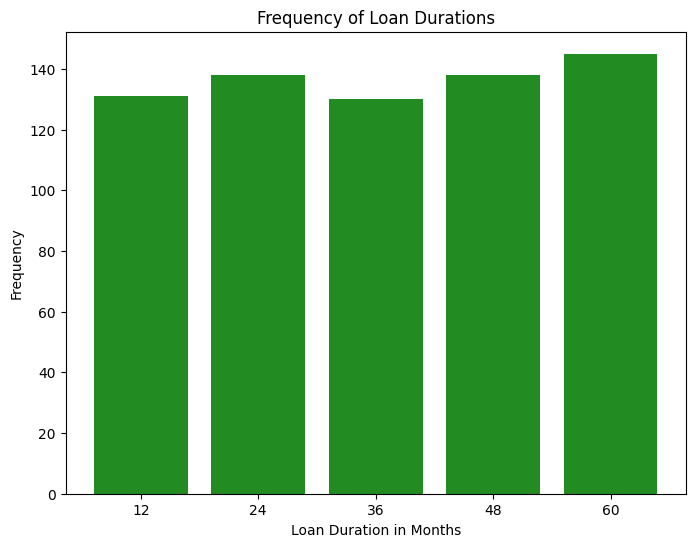

In [51]:
# How popular is which duration of the loan?
duration_counts_sorted = loan['duration'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 6))
plt.bar(duration_counts_sorted.index.astype(str), duration_counts_sorted.values, color="forestgreen")
plt.xlabel('Loan Duration in Months')
plt.ylabel('Frequency')
plt.title('Frequency of Loan Durations')
plt.xticks(rotation=0)
plt.show()

In [52]:
loan['duration'].describe()

count    682.000000
mean      36.492669
std       17.075219
min       12.000000
25%       24.000000
50%       36.000000
75%       48.000000
max       60.000000
Name: duration, dtype: float64

In [53]:
# Can one account have more than one loan?
account_loan_counts = loan['account_id'].value_counts()
print(account_loan_counts[account_loan_counts > 1])

Series([], Name: count, dtype: int64)


In [54]:
print(loan.columns)

Index(['loan_id', 'account_id', 'date', 'amount', 'duration', 'payments',
       'status'],
      dtype='object')


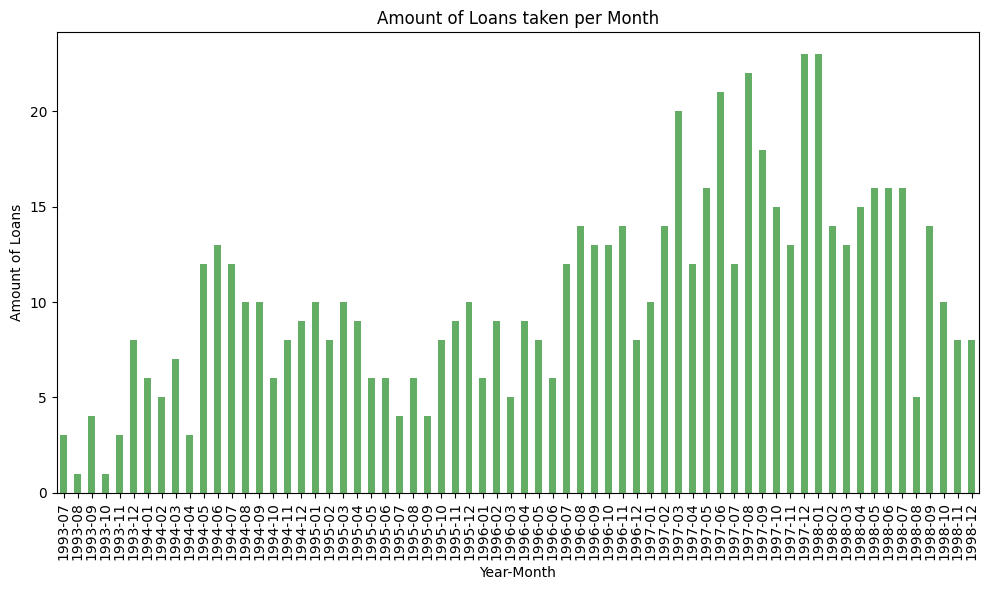

In [55]:
# How many loans are there taken per month?

loan['loan_taken_per_month'] = loan['date'].dt.to_period('M')
loans_per_month = loan.groupby('loan_taken_per_month').size()

# Plot 
plt.figure(figsize=(10, 6))
loans_per_month.plot(kind='bar', color='forestgreen', alpha=0.7)
plt.title('Amount of Loans taken per Month')
plt.xlabel('Year-Month')
plt.ylabel('Amount of Loans')
plt.tight_layout()
plt.show()

Short summary: Every loan has an unique ID which is connected so the account_id. The loans are also categorised and the duration is in months. The minimal duration is 12 months and the maximum duration is 60 months. There is no account with more than one loan. 

### Cards

In [56]:
# Getting an overview
print(card.shape)
print(card.info())
print(card.isnull().sum())
card.head()

(892, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   card_id  892 non-null    int64 
 1   disp_id  892 non-null    int64 
 2   type     892 non-null    object
 3   issued   892 non-null    object
dtypes: int64(2), object(2)
memory usage: 28.0+ KB
None
card_id    0
disp_id    0
type       0
issued     0
dtype: int64


,card_id,disp_id,type,issued
0,1005,9285,classic,931107 00:00:00
1,104,588,classic,940119 00:00:00
2,747,4915,classic,940205 00:00:00
3,70,439,classic,940208 00:00:00
4,577,3687,classic,940215 00:00:00


In [ ]:
# Fixing the format
card['issued'] = pd.to_datetime(card['issued'], format='%y%m%d %H:%M:%S')
card['type'].value_counts()

type
classic    659
junior     145
gold        88
Name: count, dtype: int64

In [58]:
# Making the table readable (issued means ausgestellt)
card['issued'] = pd.to_datetime(card['issued'], format='%y%m%d %H:%M:%S', errors='coerce')

table = PrettyTable()
table.field_names = ["card_id", "disp_id", "type", "issued"]

for index, row in card.head(10).iterrows():
    table.add_row([row['card_id'], row['disp_id'], row['type'], row['issued']])

print(table)

+---------+---------+---------+---------------------+
| card_id | disp_id |   type  |        issued       |
+---------+---------+---------+---------------------+
|   1005  |   9285  | classic | 1993-11-07 00:00:00 |
|   104   |   588   | classic | 1994-01-19 00:00:00 |
|   747   |   4915  | classic | 1994-02-05 00:00:00 |
|    70   |   439   | classic | 1994-02-08 00:00:00 |
|   577   |   3687  | classic | 1994-02-15 00:00:00 |
|   377   |   2429  | classic | 1994-03-03 00:00:00 |
|   721   |   4680  |  junior | 1994-04-05 00:00:00 |
|   437   |   2762  | classic | 1994-06-01 00:00:00 |
|   188   |   1146  | classic | 1994-06-19 00:00:00 |
|    13   |    87   | classic | 1994-06-29 00:00:00 |
+---------+---------+---------+---------------------+


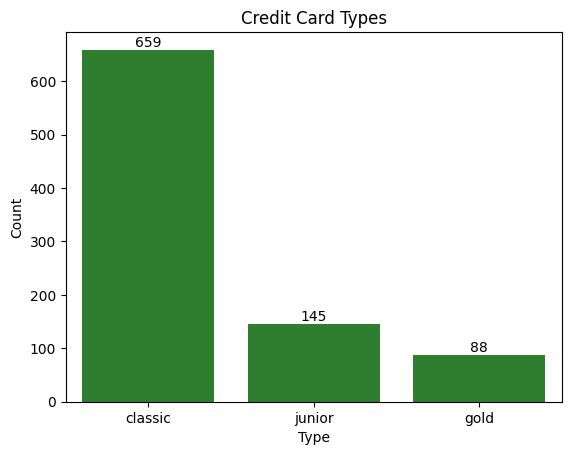

In [59]:
# How many users does every card type have?
ax = sns.countplot(data=card, x='type', color='forestgreen')
plt.title('Credit Card Types')
plt.xlabel('Type')
plt.ylabel('Count')
for bar in ax.containers:
    ax.bar_label(bar, fmt='%d', label_type='edge', fontsize=10, color='black')
plt.show()

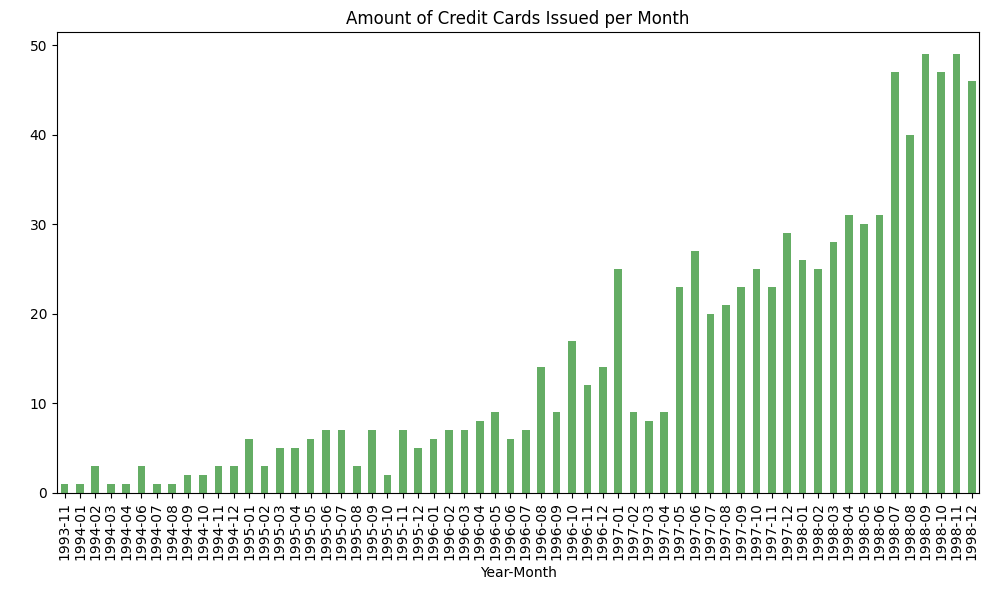

In [60]:
# In what year and month are the most cards bought?

card['card_year_month'] = card['issued'].dt.to_period('M')
cards_per_month = card.groupby('card_year_month').size()

# Plot
plt.figure(figsize=(10, 6))
cards_per_month.plot(kind='bar', color='forestgreen', alpha=0.7)
plt.title('Amount of Credit Cards Issued per Month')
plt.xlabel('Year-Month')
plt.ylabel(' ')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Summary: There are three card types: classic (659), junior (145) and gold (88). We can see, that the classic card is the most popular option for the clients. 

### Permanent Orders

In [ ]:
# Getting an overview
print(order.shape)
print(order.info())
print(order.isnull().sum())
order.head()

(6471, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    6471 non-null   int64  
 1   account_id  6471 non-null   int64  
 2   bank_to     6471 non-null   object 
 3   account_to  6471 non-null   int64  
 4   amount      6471 non-null   float64
 5   k_symbol    6471 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 303.5+ KB
None
order_id      0
account_id    0
bank_to       0
account_to    0
amount        0
k_symbol      0
dtype: int64


,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,


In [ ]:
# Changing the k_symbol to English
order.rename(columns={'k_symbol': 'payment_type'}, inplace=True)
payment_type_mapping = {
    'POJISTNE': 'insurance payment',
    'SIPO': 'household',
    'LEASING': 'leasing',
    'UVER': 'loan payment'
}
order['payment_type'] = order['payment_type'].map(payment_type_mapping)
order

,order_id,account_id,bank_to,account_to,amount,payment_type
0,29401,1,YZ,87144583,2452.0,household
1,29402,2,ST,89597016,3372.7,loan payment
2,29403,2,QR,13943797,7266.0,household
3,29404,3,WX,83084338,1135.0,household
4,29405,3,CD,24485939,327.0,NaN
...,...,...,...,...,...,...
6466,46334,11362,YZ,70641225,4780.0,household
6467,46335,11362,MN,78507822,56.0,NaN
6468,46336,11362,ST,40799850,330.0,insurance payment
6469,46337,11362,KL,20009470,129.0,NaN


In [63]:
# See which type is used most
order['payment_type'].value_counts()

payment_type
household            3502
loan payment          717
insurance payment     532
leasing               341
Name: count, dtype: int64

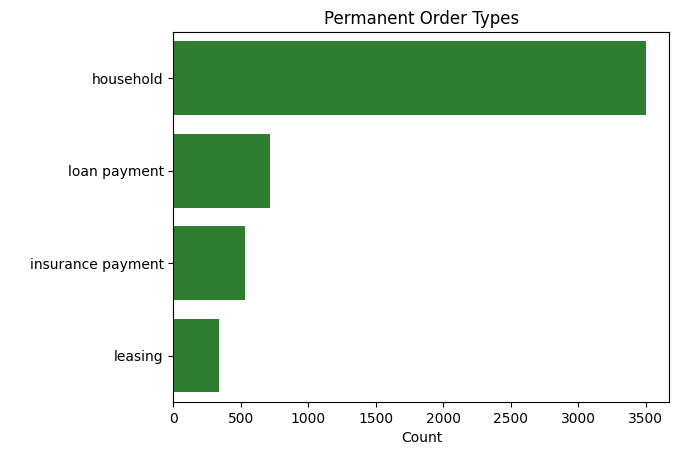

In [64]:
# Visualising the types
sns.countplot(data=order, y='payment_type', order=order['payment_type'].value_counts().index, color = 'forestgreen')
plt.title('Permanent Order Types')
plt.xlabel('Count')
plt.ylabel(' ')
plt.show()

## 2. Combining Customer and Banking Service Information


We combine the data from the six CSVs with eachother to see how they are being used. In the dataset disp.csv we have disp_id and client_id and account_id so we can combine the client to an account and also see if he's an owner or disponent. 

Remember: The goal of this Challenge is to generate customer lists for a personalised credit card advertising campaign without junior cards.

In [65]:
# Renaming the column names so we won't have date_x as column names
disp = disp.rename(columns={'type': 'disp_type'})
card = card.rename(columns={'type': 'card_type'})
trans = trans.rename(columns={'type': 'trans_type'})
trans = trans.rename(columns={'date': 'trans_date'})
loan = loan.rename(columns={'date': 'loan_date'})
loan = loan.rename(columns={'amount': 'loan_amount'})
trans = trans.rename(columns={'amount': 'trans_amount'})
account = account.rename(columns={'date': 'auto_trans_date'})

In [66]:
# Merging the first two dataframes
client_disp = pd.merge(client, disp, on='client_id', how='inner')
client_account = pd.merge(client_disp, account, on='account_id', how='inner')
client_account.rename(columns={'district_id_x': 'client_district_id', 'district_id_y': 'account_district_id'}, inplace=True)
client_account = pd.merge(
    client_account,
    district,
    left_on='client_district_id',
    right_on='district_id',
    how='left'
)

In [67]:
# Combine the others
# Merges für die verschiedenen DataFrames
loan_account = pd.merge(loan, account, on='account_id', how='inner')
client_account_loan = pd.merge(client_account, loan_account, on='account_id', how='left', suffixes=('', '_loan'))
card_disp = pd.merge(card, disp, on='disp_id', how='inner')
data_combined = pd.merge(client_account_loan, card_disp, on=['client_id', 'account_id'], how='left', suffixes=('', '_card'))
data_combined = pd.merge(data_combined, trans, on='account_id', how='left', suffixes=('', '_trans'))

#### Data Pipeline Overview:
1. Loaded raw data (accounts, clients, dispositions, transactions, etc.)
2. Transformed date formats, extracted age and gender from birth_number.
3. Merged all dataframes into a single DataFrame.

## 3. Cleaning the Dataset for Model Development


Here we "clean" the data which means we decide, what data we will use for the models. 

In [68]:
# Deciding which columns we don't need
data_combined.columns

Index(['client_id', 'client_district_id', 'gender', 'birth_date', 'age',
       'birth_year', 'disp_id', 'account_id', 'disp_type',
       'account_district_id', 'frequency', 'auto_trans_date', 'district_id',
       'district_name', 'region', 'inhabitants', 'villages_less_499',
       'villages_500_to_1999', 'villages_2000_to_9999',
       'villages_with_more_10000', 'number_of_cities',
       'ratio_urban_inhabitants', 'average_salary', 'unemployment_rate_95',
       'unemployment_rate_96', 'entrepreneurs_per_1000_inhabitants',
       'committed_crimes_95', 'committed_crimes_96', 'loan_id', 'loan_date',
       'loan_amount', 'duration', 'payments', 'status', 'loan_taken_per_month',
       'district_id_loan', 'frequency_loan', 'auto_trans_date_loan', 'card_id',
       'disp_id_card', 'card_type', 'issued', 'card_year_month',
       'disp_type_card', 'trans_id', 'trans_date', 'trans_type', 'operation',
       'trans_amount', 'balance', 'transaction_type', 'bank', 'account',
       'firs

For the model we don't need the district_id (and we have to remove one because it's twice in there), 'villages_less_499', 'villages_500_to_1999', 'villages_2000_to_9999', 'villages_with_more_10000', 'number_of_cities', 'ratio_urban_inhabitants', 'unemployment_rate_95','unemployment_rate_96', 'entrepreneurs_per_1000_inhabitants','committed_crimes_95', 'committed_crimes_96', bank, account, loan_id. 

In [69]:
# Cleaning
columns_to_remove = [
    'client_district_id', 'account_district_id', 'villages_less_499', 'villages_500_to_1999',
    'villages_2000_to_9999', 'villages_with_more_10000', 'number_of_cities',
    'ratio_urban_inhabitants', 'unemployment_rate_95', 'unemployment_rate_96',
    'entrepreneurs_per_1000_inhabitants', 'committed_crimes_95',
    'committed_crimes_96', 'loan_id', 'bank', 'trans_id', 'account'
]

data_clean = data_combined.drop(columns=columns_to_remove)

In [70]:
# Identify columns with missing values
missing_values = data_clean.isnull().sum()
print(missing_values[missing_values > 0])

frequency                 27836
loan_date               1028998
loan_amount             1028998
duration                1028998
payments                1028998
status                  1028998
loan_taken_per_month    1028998
district_id_loan        1028998
frequency_loan          1040205
auto_trans_date_loan    1028998
card_id                 1040687
disp_id_card            1040687
card_type               1040687
issued                  1040687
card_year_month         1040687
disp_type_card          1040687
trans_type                19487
operation                218311
transaction_type         634685
dtype: int64


We have some missing data. We need to decide on a strategy:

 - Drop columns or rows with excessive missing values
 - Impute missing values using appropriate methods

# Model Construction

## 4. Identifying Existing Credit Card Holders, Including Purchase Date and Roll-Up Window


We assume that the date at issued is when they got the card so we define this as the purchase date. 

In [71]:
# Making sure that is in datetime format
data_clean['issued'] = pd.to_datetime(data_clean['issued'], format='%y%m%d %H:%M:%S')
#print(data_clean[['client_id', 'issued']])

In [72]:
data_clean['age_at_issue'] = (data_clean['issued'] - data_clean['birth_date']).dt.days / 365
junior_holders = data_clean[data_clean['card_type'] == 'junior']

oldest_junior_age_at_issue = junior_holders['age_at_issue'].max()
print(f"The oldest person who got a junior card was {oldest_junior_age_at_issue:.2f} years old at issuance.")



The oldest person who got a junior card was 20.90 years old at issuance.


In [73]:
# Define the roll-up window: We decided to take 396 days (= one year and one month) so we have one year back and the same month one year ago

data_clean['rollup_start_date'] = data_clean['issued'] - timedelta(days=396)
data_clean['rollup_end_date'] = data_clean['issued'] - timedelta(days=31)
data_clean.columns

Index(['client_id', 'gender', 'birth_date', 'age', 'birth_year', 'disp_id',
       'account_id', 'disp_type', 'frequency', 'auto_trans_date',
       'district_id', 'district_name', 'region', 'inhabitants',
       'average_salary', 'loan_date', 'loan_amount', 'duration', 'payments',
       'status', 'loan_taken_per_month', 'district_id_loan', 'frequency_loan',
       'auto_trans_date_loan', 'card_id', 'disp_id_card', 'card_type',
       'issued', 'card_year_month', 'disp_type_card', 'trans_date',
       'trans_type', 'operation', 'trans_amount', 'balance',
       'transaction_type', 'first_transaction_year_month', 'age_at_issue',
       'rollup_start_date', 'rollup_end_date'],
      dtype='object')

In [74]:
# Creating dataframe with clients who have a credit card (without junior and NA)
card_clients = data_clean[(data_clean['card_type'] != 'junior') & (data_clean['card_type'].notna())]
unique_client_count = card_clients['client_id'].nunique()
print(f"Amount of unique Credit Card Users: {unique_client_count}")

Amount of unique Credit Card Users: 747


In [75]:
print(card_clients.columns)

Index(['client_id', 'gender', 'birth_date', 'age', 'birth_year', 'disp_id',
       'account_id', 'disp_type', 'frequency', 'auto_trans_date',
       'district_id', 'district_name', 'region', 'inhabitants',
       'average_salary', 'loan_date', 'loan_amount', 'duration', 'payments',
       'status', 'loan_taken_per_month', 'district_id_loan', 'frequency_loan',
       'auto_trans_date_loan', 'card_id', 'disp_id_card', 'card_type',
       'issued', 'card_year_month', 'disp_type_card', 'trans_date',
       'trans_type', 'operation', 'trans_amount', 'balance',
       'transaction_type', 'first_transaction_year_month', 'age_at_issue',
       'rollup_start_date', 'rollup_end_date'],
      dtype='object')


Here we do some data wrangling with the newly created dataframe:

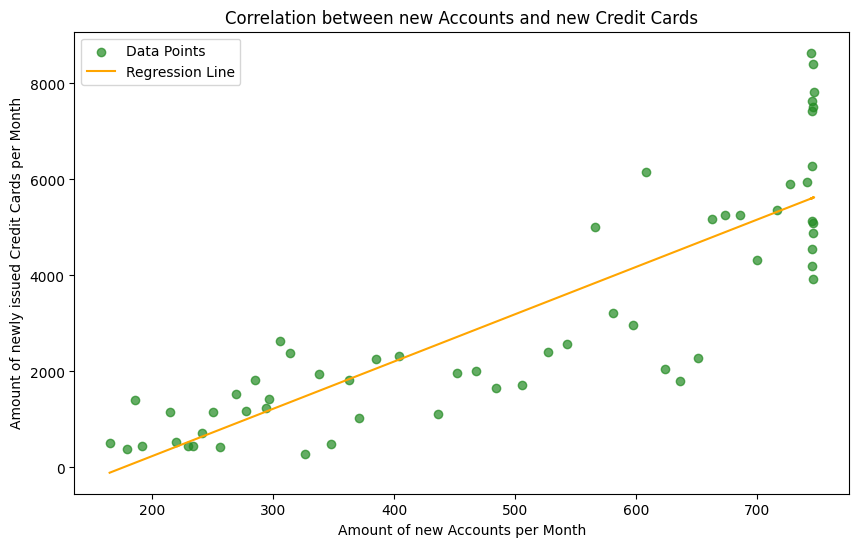

Korrelation: 0.86


In [76]:
# Do people who open a new account also get a credit card?

accounts_per_month = card_clients.groupby('first_transaction_year_month')['account_id'].nunique()
cards_per_month = card_clients.groupby('card_year_month').size()
common_index = accounts_per_month.index.intersection(cards_per_month.index) # Here ChatGPT had to help because we didn't know we had to use the indices
accounts_aligned = accounts_per_month.reindex(common_index)
cards_aligned = cards_per_month.reindex(common_index)
correlation = accounts_aligned.corr(cards_aligned)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(accounts_aligned, cards_aligned, color='forestgreen', alpha=0.7, label='Data Points')
m, b = np.polyfit(accounts_aligned, cards_aligned, 1)  # Steigung (m) und Achsenabschnitt (b)
plt.plot(accounts_aligned, m * accounts_aligned + b, color='orange', label='Regression Line')
plt.xlabel('Amount of new Accounts per Month')
plt.ylabel('Amount of newly issued Credit Cards per Month')
plt.title(f'Correlation between new Accounts and new Credit Cards')
plt.legend()
plt.show()

print(f"Korrelation: {correlation:.2f}")

In [77]:
print(card_clients.columns)

Index(['client_id', 'gender', 'birth_date', 'age', 'birth_year', 'disp_id',
       'account_id', 'disp_type', 'frequency', 'auto_trans_date',
       'district_id', 'district_name', 'region', 'inhabitants',
       'average_salary', 'loan_date', 'loan_amount', 'duration', 'payments',
       'status', 'loan_taken_per_month', 'district_id_loan', 'frequency_loan',
       'auto_trans_date_loan', 'card_id', 'disp_id_card', 'card_type',
       'issued', 'card_year_month', 'disp_type_card', 'trans_date',
       'trans_type', 'operation', 'trans_amount', 'balance',
       'transaction_type', 'first_transaction_year_month', 'age_at_issue',
       'rollup_start_date', 'rollup_end_date'],
      dtype='object')


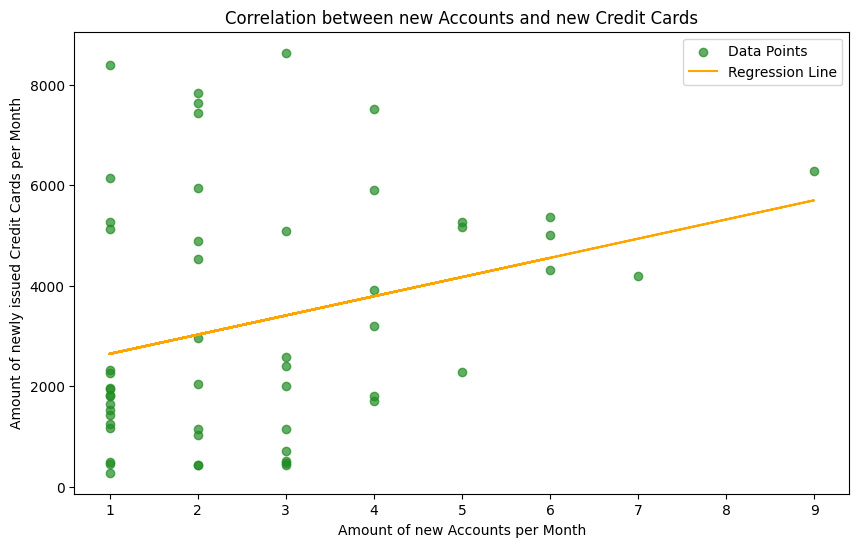

Correlation: 0.28


In [78]:
# Do people who get a loan also get a Credit Card?
loans_per_month = card_clients.groupby('loan_taken_per_month')['account_id'].nunique()
cards_per_month = card_clients.groupby('card_year_month').size()
common_index = loans_per_month.index.intersection(cards_per_month.index)
accounts_aligned = loans_per_month.reindex(common_index)
cards_aligned = cards_per_month.reindex(common_index)
correlation = accounts_aligned.corr(cards_aligned)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(accounts_aligned, cards_aligned, color='forestgreen', alpha=0.7, label='Data Points')
m, b = np.polyfit(accounts_aligned, cards_aligned, 1)  
plt.plot(accounts_aligned, m * accounts_aligned + b, color='orange', label='Regression Line')
plt.xlabel('Amount of new Accounts per Month')
plt.ylabel('Amount of newly issued Credit Cards per Month')
plt.title(f'Correlation between new Accounts and new Credit Cards')
plt.legend()
plt.show()

print(f"Correlation: {correlation:.2f}")

## 5. Determining Non-Buyers for Comparison (Including Roll-Up Window)


Here we make dataframes with only Junior-Card-Users and only Non-Credit-Card-Users and then we make one with those two together in case we need it later. 

In [79]:
# Creating dataframe with clients who have a junior card
junior_card = data_clean[(data_clean['card_type'] == 'junior')]
unique_client_count = junior_card['client_id'].nunique()
print(f"Amount of unique Credit Card Users: {unique_client_count}")

Amount of unique Credit Card Users: 145


In [80]:
# Creating dataframe with clients who don't have a card
no_card = data_clean[(data_clean['card_type'].isna())]
unique_client_count = no_card['client_id'].nunique()
print(f"Amount of unique non-Credit Card Users: {unique_client_count}")

Amount of unique non-Credit Card Users: 4477


In [81]:
# Creating dataframe with clients who have either a junior card or no card 
no_and_junior_card = data_clean[(data_clean['card_type'] == 'junior') | (data_clean['card_type'].isna())]
unique_client_count = no_and_junior_card['client_id'].nunique()
print(f"Amount of unique Junior-Card and non-Credit Card Users: {unique_client_count}")

Amount of unique Junior-Card and non-Credit Card Users: 4622


Now we add the Roll-up-Window. We go back 13 months (396 days) so we have one year and the same month one year ago to compare.

In [82]:
import numpy as np
import pandas as pd

# Sort buyer_dates for binary search
buyer_dates = np.sort(card_clients['issued'].dropna().values)
required_days = oldest_junior_age_at_issue * 365.25

chosen_reference_dates = []

# Using iterrows is still not the most efficient, but let's keep it for clarity.
# If performance is critical, consider vectorization.
for idx, row in no_card.iterrows():
    birth_date = row['birth_date']
    min_eligible_date = birth_date + pd.Timedelta(days=required_days)
    
    # Use binary search to find the first index in buyer_dates that is greater than min_eligible_date
    insertion_point = np.searchsorted(buyer_dates, np.datetime64(min_eligible_date))
    
    if insertion_point == len(buyer_dates):
        # No eligible date found
        chosen_date = pd.NaT
    else:
        # Randomly select from eligible dates starting at insertion_point
        # Avoid slicing for performance and just pick an index randomly
        random_idx = np.random.randint(insertion_point, len(buyer_dates))
        chosen_date = buyer_dates[random_idx]
    
    chosen_reference_dates.append(chosen_date)

no_card['rollup_end_date'] = chosen_reference_dates


/tmp/ipykernel_15606/2587494183.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_card['rollup_end_date'] = chosen_reference_dates


In [83]:
no_card['rollup_start_date'] = no_card['rollup_end_date'] - timedelta(days=361)

/tmp/ipykernel_15606/448003997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_card['rollup_start_date'] = no_card['rollup_end_date'] - timedelta(days=361)


In [84]:
# Checking if the roll-up-window worked
buyers_with_full_rollup = card_clients[
    card_clients['rollup_end_date'] - card_clients['rollup_start_date'] >= pd.Timedelta(days=0)
]['client_id'].nunique()

non_buyers_with_full_rollup = no_card[
    no_card['rollup_end_date'] - no_card['rollup_start_date'] >= pd.Timedelta(days=0)
]['client_id'].nunique()

print("Number of unique Credit Card Buyers with 12-month Roll-Up:", buyers_with_full_rollup)
print("Number of unique Non-Buyers with 12-month Roll-Up:", non_buyers_with_full_rollup)

Number of unique Credit Card Buyers with 12-month Roll-Up: 747
Number of unique Non-Buyers with 12-month Roll-Up: 4215


With this new dataframe we do some data wrangling. 

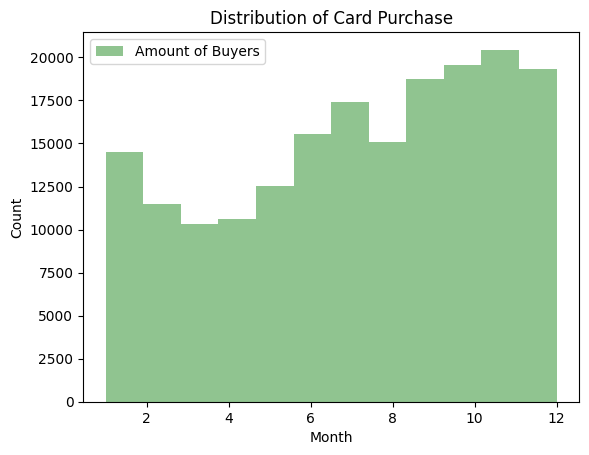

In [85]:
# In which month do card users use the card most?
buyers_with_full_rollup_df = card_clients[
    (card_clients['rollup_end_date'] - card_clients['rollup_start_date']) >= pd.Timedelta(days=365)
]
purchase_times = buyers_with_full_rollup_df['issued']

# Plot
plt.figure()
plt.hist(purchase_times.dt.month, bins=12, alpha=0.5, label='Amount of Buyers', color='forestgreen')
plt.title('Distribution of Card Purchase')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.show()

The plot shows that in November are the most cards bought. 

## 6. Generating Event-Related Customer Information Before Credit Card Purchase Based on Transaction History


We use the dataset trans and disp. We merge them because in the dataset trans there are no Client IDs and we need them to see the transaction history. There also is the account_id which will be also helpful. 

In [86]:
# Merge transactions with dispositions to get client_id
trans_disp = pd.merge(trans, disp, on='account_id', how='inner')

We defined a Roll-up-Window. Within this window we want to see the transactions of the card clients. First, we write a function (so we can reuse it if needed) and then we apply it to the card clients. 

In [87]:
# # Here we asked ChatGPT if it can write us this function
# def get_transactions_within_window(client_id, start_date, end_date):
#     client_trans = trans_disp[trans_disp['client_id'] == client_id]
#     window_trans = client_trans[(client_trans['trans_date'] >= start_date) & (client_trans['trans_date'] <= end_date)]
#     return window_trans

In [88]:
# # Apply to all card clients
# card_clients['transactions'] = card_clients.apply(
#     lambda row: get_transactions_within_window(
#         row['client_id'], row['rollup_start_date'], row['rollup_end_date']
#     ), axis=1
# )

In [89]:
# # Pre-group transactions by client
# trans_by_client = dict(tuple(trans_disp.groupby('client_id')))

# def get_transactions_within_window_fast(client_id, start_date, end_date):
#     # Retrieve pre-filtered client transactions
#     client_trans = trans_by_client.get(client_id, pd.DataFrame())
#     # Filter by date range
#     return client_trans[(client_trans['trans_date'] >= start_date) & (client_trans['trans_date'] <= end_date)]

# # Now, apply with a function that just references the grouped data
# card_clients['transactions'] = card_clients.apply(
#     lambda row: get_transactions_within_window_fast(
#         row['client_id'], row['rollup_start_date'], row['rollup_end_date']
#     ), axis=1
# )


In [ ]:
trans_disp_sorted = trans_disp.sort_values(by=['client_id', 'trans_date'])
trans_by_client = dict(tuple(trans_disp_sorted.groupby('client_id')))

def get_transactions_within_window_fast(client_id, start_date, end_date):
    # Ensure that start_date and end_date are numpy datetime64
    start_date_np = np.datetime64(start_date)
    end_date_np = np.datetime64(end_date)
    
    # Retrieve once
    client_trans = trans_by_client.get(client_id, pd.DataFrame())
    
    # Ensure dates are numpy datetime64 arrays
    dates = client_trans['trans_date'].astype('datetime64[ns]').values

    # Use binary search to find start and end indices
    start_idx = np.searchsorted(dates, start_date_np, side='left')
    end_idx = np.searchsorted(dates, end_date_np, side='right')
    return client_trans.iloc[start_idx:end_idx]

card_clients['transactions'] = card_clients.apply(
    lambda row: get_transactions_within_window_fast(
        row['client_id'], row['rollup_start_date'], row['rollup_end_date']
    ), axis=1
)


Next we want to extract some general features about the transactions like amount of transactions or the total amount, etc. 

In [90]:
def extract_features(transactions):
    features = {}
    features['amount_transactions'] = len(transactions)
    features['total_amount'] = transactions['amount'].sum()
    features['average_amount'] = transactions['amount'].mean()
    features['max_balance'] = transactions['balance'].max()
    features['min_balance'] = transactions['balance'].min()
    return pd.Series(features)

card_clients = card_clients.join(card_clients['transactions'].apply(extract_features))


KeyError: 'transactions'

In [ ]:
# Merge non-buyers with dispositions to get account IDs
non_buyers_disp = pd.merge(non_buyers_with_full_rollup, disp, on='client_id', how='inner')

# Merge with accounts to get account opening dates if needed
non_buyers_disp = pd.merge(non_buyers_disp, account, on='account_id', how='inner')


In [ ]:
non_buyers_disp['transactions'] = non_buyers_disp.apply(
    lambda row: get_transactions_within_window(
        row['client_id'], row['rollup_start_date'], row['rollup_end_date']
    ), axis=1
)


In [ ]:
# Extract features for each non-buyer
non_buyers_disp = non_buyers_disp.join(non_buyers_disp['transactions'].apply(extract_features))


In [ ]:
# Add a target variable: 1 for buyers, 0 for non-buyers
card_clients['target'] = 1
non_buyers_disp['target'] = 0

# Select relevant features and combine datasets
features = ['client_id', 'num_transactions', 'total_amount', 'average_amount', 'max_balance', 'min_balance', 'target']
buyers_data = card_clients[features]
non_buyers_data = non_buyers_disp[features]

# Combine the data
model_data = pd.concat([buyers_data, non_buyers_data], ignore_index=True)


In [ ]:
model_data.head()

,client_id,num_transactions,total_amount,average_amount,max_balance,min_balance,target
0,9593,62.0,1023251.9,16504.062903,124339.4,600.0,1
1,588,26.0,227104.7,8734.796154,56942.8,900.0,1
2,4915,44.0,533463.5,12124.170455,81177.0,300.0,1
3,439,56.0,504138.9,9002.480357,80116.3,600.0,1
4,3687,51.0,721859.4,14154.105882,107680.9,900.0,1


# Feature Engineering


## 7. Deriving Customer-Specific Statistical Metrics for Wealth and Transactions in the Roll-Up Window


In [ ]:
def calculate_wealth_metrics(transactions):
    if transactions.empty:
        return pd.Series({
            'avg_balance': 0,
            'balance_std': 0,
            'ending_balance': 0
        })
    else:
        balances = transactions['balance']
        avg_balance = balances.mean()
        balance_std = balances.std()
        # Assuming transactions are sorted by date
        ending_balance = transactions.sort_values('date', ascending=True)['balance'].iloc[-1]
        return pd.Series({
            'avg_balance': avg_balance,
            'balance_std': balance_std,
            'ending_balance': ending_balance
        })


In [ ]:
def calculate_transaction_metrics(transactions):
    if transactions.empty:
        return pd.Series({
            'num_debit_transactions': 0,
            'num_credit_transactions': 0,
            'total_debit_amount': 0,
            'total_credit_amount': 0,
            'avg_transaction_amount': 0,
            'transaction_frequency': 0
        })
    else:
        num_transactions = len(transactions)
        num_debit_transactions = len(transactions[transactions['type_x'] == 'VYDAJ'])
        num_credit_transactions = len(transactions[transactions['type_x'] == 'PRIJEM'])
        total_debit_amount = transactions[transactions['type_x'] == 'VYDAJ']['amount'].sum()
        total_credit_amount = transactions[transactions['type_x'] == 'PRIJEM']['amount'].sum()
        avg_transaction_amount = transactions['amount'].mean()
        # Calculate transaction frequency as transactions per day
        num_days = (transactions['date'].max() - transactions['date'].min()).days + 1
        transaction_frequency = num_transactions / num_days if num_days > 0 else 0
        return pd.Series({
            'num_debit_transactions': num_debit_transactions,
            'num_credit_transactions': num_credit_transactions,
            'total_debit_amount': total_debit_amount,
            'total_credit_amount': total_credit_amount,
            'avg_transaction_amount': avg_transaction_amount,
            'transaction_frequency': transaction_frequency
        })


In [ ]:
# Apply the wealth metrics function
card_clients = card_clients.join(card_clients['transactions'].apply(calculate_wealth_metrics))
card_clients = card_clients.join(card_clients['transactions'].apply(calculate_transaction_metrics))


In [ ]:
# Apply the wealth metrics function
non_buyers_disp = non_buyers_disp.join(non_buyers_disp['transactions'].apply(calculate_wealth_metrics))
non_buyers_disp = non_buyers_disp.join(non_buyers_disp['transactions'].apply(calculate_transaction_metrics))


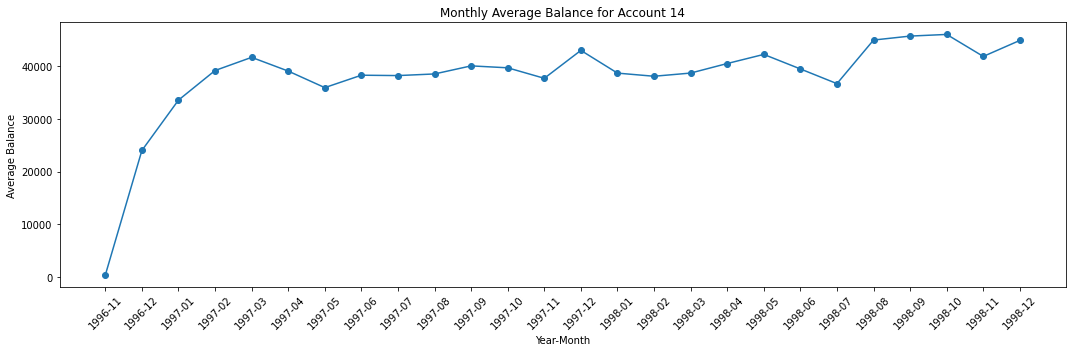

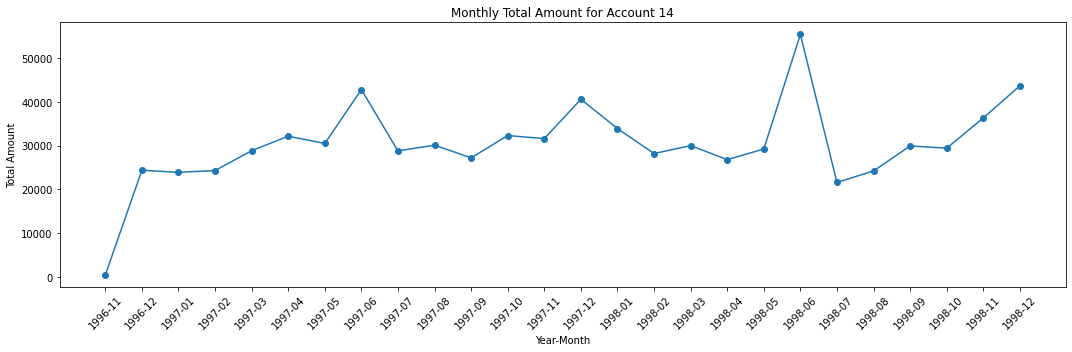

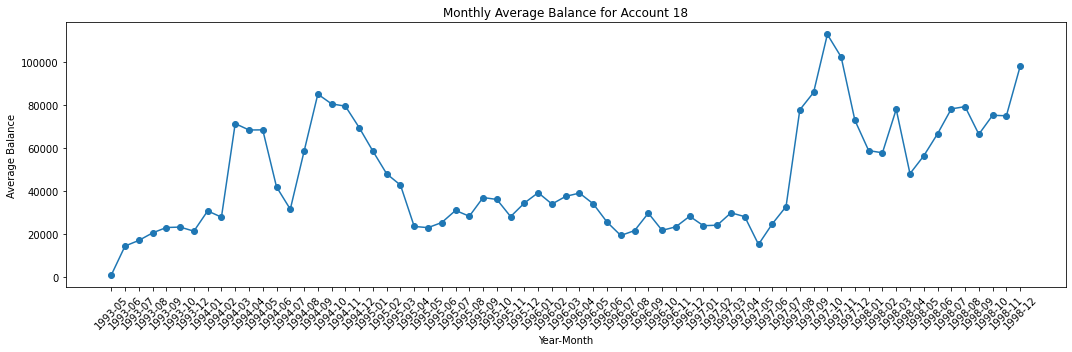

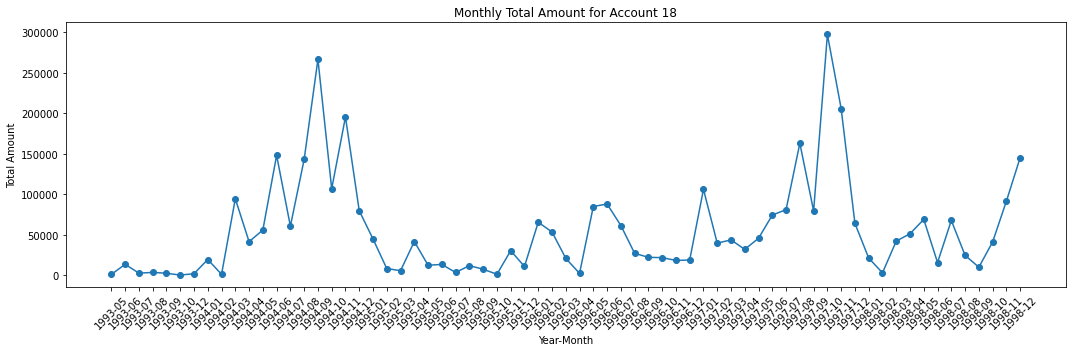

In [ ]:
def plot_monthly_trends(account_id):
    # Filter transactions for the specified account
    account_data = trans_disp[trans_disp['account_id'] == account_id].copy()

    # Ensure 'date' is datetime
    account_data['date'] = pd.to_datetime(account_data['date'], errors='coerce')

    # Extract year and month
    account_data['year_month'] = account_data['date'].dt.to_period('M')

    # Aggregate monthly metrics: average balance and total amount
    monthly_stats = account_data.groupby('year_month').agg(
        avg_balance=('balance', 'mean'),
        total_amount=('amount', 'sum')
    ).reset_index()

    # Convert Period to string for plotting
    monthly_stats['year_month'] = monthly_stats['year_month'].astype(str)

    # Plot Average Balance Over Time
    plt.figure(figsize=(15,5))
    plt.plot(monthly_stats['year_month'], monthly_stats['avg_balance'], marker='o')
    plt.title(f'Monthly Average Balance for Account {account_id}')
    plt.xlabel('Year-Month')
    plt.ylabel('Average Balance')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot Total Amount (Revenue) Over Time
    plt.figure(figsize=(15,5))
    plt.plot(monthly_stats['year_month'], monthly_stats['total_amount'], marker='o')
    plt.title(f'Monthly Total Amount for Account {account_id}')
    plt.xlabel('Year-Month')
    plt.ylabel('Total Amount')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage for Account #14 and Account #18:
plot_monthly_trends(14)
plot_monthly_trends(18)


## 8. Combining Event-Related Information from Credit Card Buyers and Non-Buyers


In [ ]:
buyers_features = [
    'client_id', 'avg_balance', 'max_balance', 'min_balance', 'balance_std', 'ending_balance',
    'num_transactions', 'num_debit_transactions', 'num_credit_transactions',
    'total_debit_amount', 'total_credit_amount', 'avg_transaction_amount', 'transaction_frequency'
]

buyers_data = card_clients[buyers_features].copy()
buyers_data['target'] = 1


In [ ]:
non_buyers_features = buyers_features  # Same features as buyers

non_buyers_data = non_buyers_disp[non_buyers_features].copy()
non_buyers_data['target'] = 0


In [ ]:
model_data = pd.concat([buyers_data, non_buyers_data], ignore_index=True)


In [ ]:
# Reset index
model_data.reset_index(drop=True, inplace=True)

# Handle missing values, if any
model_data.fillna(0, inplace=True)


## 9. Cleaning Unnecessary Information (e.g., IDs) and Checking the Modeling Data via Exploratory Data Analysis


In [ ]:
model_data = client.merge(model_data, on='client_id', how='inner')

In [ ]:
model_data.head()

,client_id,birth_number,district_id,birth_date,gender,age,birth_year,avg_balance,max_balance,min_balance,balance_std,ending_balance,num_transactions,num_debit_transactions,num_credit_transactions,total_debit_amount,total_credit_amount,avg_transaction_amount,transaction_frequency,target
0,1,706213,18,1970-12-13,F,28,1970,15512.411111,19885.4,10722.0,2359.016148,10918.8,63.0,38.0,25.0,47549.2,45445.2,1476.101587,0.175978,0
1,2,450204,1,1945-02-04,M,53,1945,39979.716250,62182.9,20515.7,9823.678733,59855.7,80.0,51.0,27.0,264567.2,278406.1,7078.228750,0.219780,0
2,3,406009,1,1940-10-09,F,58,1940,41762.273750,62182.9,20515.7,10213.924076,35599.7,80.0,52.0,26.0,245967.2,268304.5,6707.358750,0.220994,0
3,4,561201,5,1956-12-01,M,42,1956,25841.851064,45231.5,7593.5,8719.943905,45231.5,94.0,63.0,31.0,97687.2,110569.6,2215.497872,0.270893,0
4,5,605703,5,1960-07-03,F,38,1960,22635.224691,34122.4,7593.5,5901.558127,34122.4,81.0,52.0,29.0,96740.4,107035.0,2515.745679,0.234104,0


In [ ]:
# Remove IDs and other non-feature columns
columns_to_drop = ['client_id', 'birth_number', 'birth_date']  # Add any other unnecessary columns
model_data_cleaned = model_data.drop(columns=columns_to_drop)
model_data_cleaned['gender'] =   model_data_cleaned['gender'].map({'M': 0, 'F': 1})


In [ ]:
print(model_data_cleaned.describe())


       district_id       gender          age   birth_year    avg_balance  \
count  5369.000000  5369.000000  5369.000000  5369.000000    5369.000000   
mean     37.310114     0.492643    44.833116  1953.198361   30667.489190   
std      25.043690     0.499992    17.294431    17.282283   20824.481749   
min       1.000000     0.000000    11.000000  1911.000000   -6292.020513   
25%      14.000000     0.000000    30.000000  1940.000000   17014.628571   
50%      38.000000     0.000000    44.000000  1954.000000   29216.100000   
75%      60.000000     1.000000    58.000000  1968.000000   45154.072414   
max      77.000000     1.000000    87.000000  1987.000000  102125.104878   

         max_balance  min_balance   balance_std  ending_balance  \
count    5369.000000   5369.00000   5369.000000     5369.000000   
mean    52065.262190  12996.08320   9038.549032    32224.149115   
std     39868.785323  12627.35537   8132.422052    24550.769643   
min       -51.100000 -40817.00000      0.000000

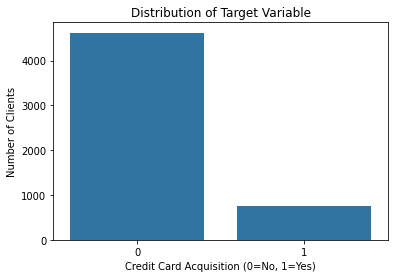

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=model_data_cleaned)
plt.title('Distribution of Target Variable')
plt.xlabel('Credit Card Acquisition (0=No, 1=Yes)')
plt.ylabel('Number of Clients')
plt.show()


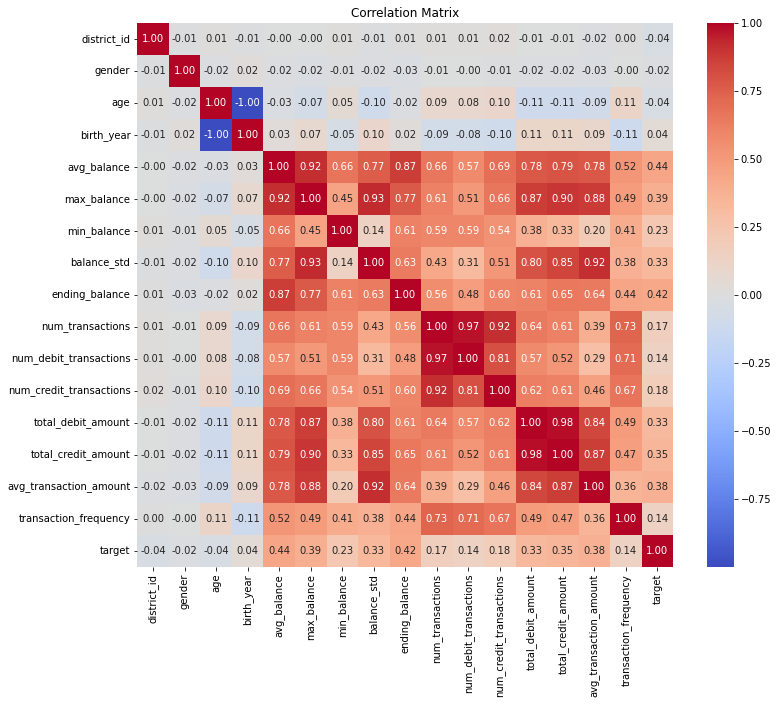

In [ ]:
corr_matrix = model_data_cleaned.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


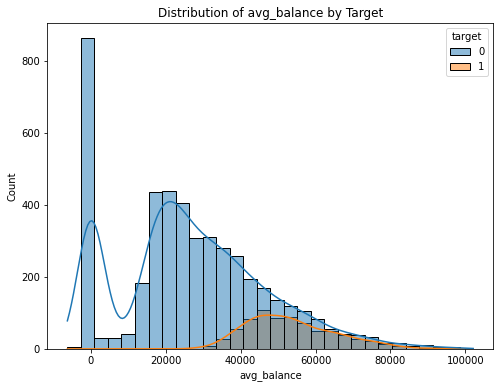

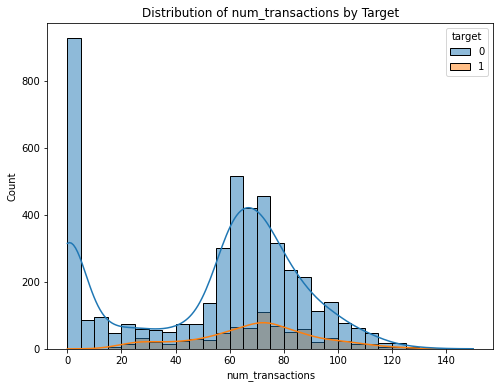

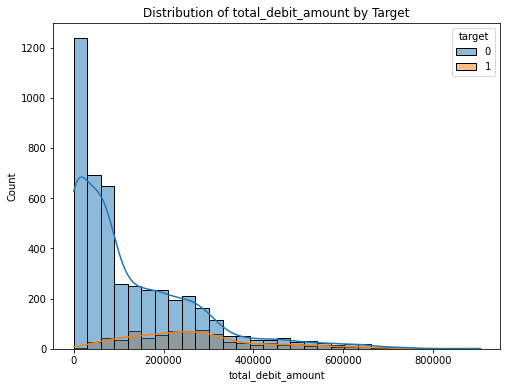

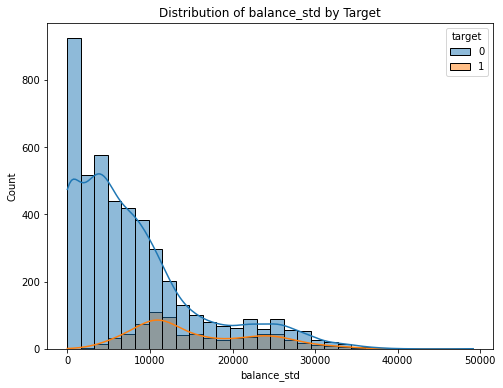

In [ ]:
feature_list = ['avg_balance', 'num_transactions', 'total_debit_amount', 'balance_std']

for feature in feature_list:
    plt.figure(figsize=(8,6))
    sns.histplot(data=model_data_cleaned, x=feature, hue='target', bins=30, kde=True)
    plt.title(f'Distribution of {feature} by Target')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = model_data_cleaned.drop(columns=[ 'target', "gender", "district_id"], axis=1)
scaled_features = scaler.fit_transform(features)

# Replace features with scaled values
model_data_cleaned[features.columns] = scaled_features


In [ ]:
from sklearn.model_selection import train_test_split

X = model_data_cleaned.drop('target', axis=1)
y = model_data_cleaned['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# Model Development


## 10. Partitioning the Data into Training and Test Sets


In [ ]:
model_data_cleaned.head()

,district_id,gender,age,birth_year,avg_balance,max_balance,min_balance,balance_std,ending_balance,num_transactions,num_debit_transactions,num_credit_transactions,total_debit_amount,total_credit_amount,avg_transaction_amount,transaction_frequency,target
0,18,1,-0.973416,0.972279,-0.727821,-0.807219,-0.180109,-0.821423,-0.867889,0.233606,0.180463,0.399283,-0.660213,-0.707707,-0.768487,0.079864,0
1,1,0,0.472270,-0.474424,0.447219,0.253797,0.595558,0.096552,1.125591,0.750350,0.755877,0.578812,0.756604,0.645267,0.497627,0.494014,0
2,1,1,0.761408,-0.763764,0.532826,0.253797,0.595558,0.144543,0.137505,0.750350,0.800139,0.489048,0.635172,0.586599,0.413808,0.505495,0
3,5,0,-0.163832,0.162126,-0.231751,-0.171422,-0.427887,-0.039181,0.529864,1.175903,1.287028,0.937870,-0.332884,-0.329482,-0.601380,0.977286,0
4,5,1,-0.395142,0.393598,-0.385749,-0.450090,-0.427887,-0.385775,0.077327,0.780746,0.800139,0.758341,-0.339065,-0.350010,-0.533522,0.629445,0


In [ ]:
# Features specified for the baseline model
features = ['age', 'gender', 'district_id', 'avg_balance', 'total_credit_amount']

# Assuming 'target' is the target variable indicating credit card acquisition
X = model_data_cleaned[features]
y = model_data_cleaned['target']


In [ ]:
# One-hot encode 'region' (if it's a categorical variable)
X = pd.get_dummies(X, columns=['district_id'], drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data (e.g., 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


## 11. Creating a Baseline Model Using Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the results
print('Baseline Logistic Regression Model Performance:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')


Baseline Logistic Regression Model Performance:
Accuracy: 0.8560
Precision: 0.4545
Recall: 0.1786
F1 Score: 0.2564
ROC AUC Score: 0.8793


In [ ]:
# Get the coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg.coef_[0]
})

print(coefficients)


                Feature  Coefficient
0                   age    -0.001979
1                gender    -0.077852
2           avg_balance     1.644054
3   total_credit_amount    -0.143086
4         district_id_2     0.359163
..                  ...          ...
75       district_id_73     0.246920
76       district_id_74    -0.491511
77       district_id_75    -0.320698
78       district_id_76    -0.261058
79       district_id_77    -0.612147

[80 rows x 2 columns]


## 12. Systematically Exploring Improvements to the Baseline Model


In [ ]:
# Include additional features
additional_features = [
    'num_transactions', 'total_debit_amount', 'avg_transaction_amount',
    'balance_std', 'ending_balance']

# Combine with previous features
expanded_features = features + additional_features

# Prepare the dataset
X_expanded = model_data_cleaned[expanded_features]

# Handle categorical variables
X_expanded['gender'] = X_expanded['gender'].map({'M': 0, 'F': 1})
X_expanded = pd.get_dummies(X_expanded, columns=['district_id'], drop_first=True)

# Fill missing values if any
X_expanded.fillna(0, inplace=True)

# Split the data
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(
    X_expanded, y, test_size=0.3, random_state=42, stratify=y
)


C:\Users\chant\AppData\Local\Temp/ipykernel_16688/916654266.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_expanded['gender'] = X_expanded['gender'].map({'M': 0, 'F': 1})


In [ ]:
# Instantiate and train the model
log_reg_exp = LogisticRegression(max_iter=1000)
log_reg_exp.fit(X_train_exp, y_train_exp)

# Evaluate the model
y_pred_exp = log_reg_exp.predict(X_test_exp)
y_pred_proba_exp = log_reg_exp.predict_proba(X_test_exp)[:, 1]

# Calculate evaluation metrics
accuracy_exp = accuracy_score(y_test_exp, y_pred_exp)
precision_exp = precision_score(y_test_exp, y_pred_exp)
recall_exp = recall_score(y_test_exp, y_pred_exp)
f1_exp = f1_score(y_test_exp, y_pred_exp)
roc_auc_exp = roc_auc_score(y_test_exp, y_pred_proba_exp)

# Print the results
print('Expanded Logistic Regression Model Performance:')
print(f'Accuracy: {accuracy_exp:.4f}')
print(f'Precision: {precision_exp:.4f}')
print(f'Recall: {recall_exp:.4f}')
print(f'F1 Score: {f1_exp:.4f}')
print(f'ROC AUC Score: {roc_auc_exp:.4f}')


Expanded Logistic Regression Model Performance:
Accuracy: 0.8579
Precision: 0.4771
Recall: 0.2321
F1 Score: 0.3123
ROC AUC Score: 0.8852


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train_exp, y_train_exp)

# Evaluate the model
y_pred_rf = rf_clf.predict(X_test_exp)
y_pred_proba_rf = rf_clf.predict_proba(X_test_exp)[:, 1]

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test_exp, y_pred_rf)
precision_rf = precision_score(y_test_exp, y_pred_rf)
recall_rf = recall_score(y_test_exp, y_pred_rf)
f1_rf = f1_score(y_test_exp, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test_exp, y_pred_proba_rf)

# Print the results
print('Random Forest Model Performance:')
print(f'Accuracy: {accuracy_rf:.4f}')
print(f'Precision: {precision_rf:.4f}')
print(f'Recall: {recall_rf:.4f}')
print(f'F1 Score: {f1_rf:.4f}')
print(f'ROC AUC Score: {roc_auc_rf:.4f}')


Random Forest Model Performance:
Accuracy: 0.8740
Precision: 0.5963
Recall: 0.2902
F1 Score: 0.3904
ROC AUC Score: 0.9067


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_clf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train_exp, y_train_exp)

# Best parameters
print(f'Best parameters found: {grid_search.best_params_}')

# Best estimator
best_rf = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_rf = best_rf.predict(X_test_exp)
y_pred_proba_best_rf = best_rf.predict_proba(X_test_exp)[:, 1]

# Calculate evaluation metrics
accuracy_best_rf = accuracy_score(y_test_exp, y_pred_best_rf)
precision_best_rf = precision_score(y_test_exp, y_pred_best_rf)
recall_best_rf = recall_score(y_test_exp, y_pred_best_rf)
f1_best_rf = f1_score(y_test_exp, y_pred_best_rf)
roc_auc_best_rf = roc_auc_score(y_test_exp, y_pred_proba_best_rf)

# Print the results
print('Optimized Random Forest Model Performance:')
print(f'Accuracy: {accuracy_best_rf:.4f}')
print(f'Precision: {precision_best_rf:.4f}')
print(f'Recall: {recall_best_rf:.4f}')
print(f'F1 Score: {f1_best_rf:.4f}')
print(f'ROC AUC Score: {roc_auc_best_rf:.4f}')


Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Random Forest Model Performance:
Accuracy: 0.8752
Precision: 0.6162
Recall: 0.2723
F1 Score: 0.3777
ROC AUC Score: 0.9119


In [ ]:
importances = best_rf.feature_importances_
feature_names = X_train_exp.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print(feature_importance_df)


                   Feature  Importance
2              avg_balance    0.207782
8           ending_balance    0.202016
6   avg_transaction_amount    0.111101
7              balance_std    0.097701
3      total_credit_amount    0.088837
..                     ...         ...
42          district_id_35    0.000404
56          district_id_49    0.000362
72          district_id_65    0.000335
31          district_id_24    0.000316
1                   gender    0.000000

[85 rows x 2 columns]


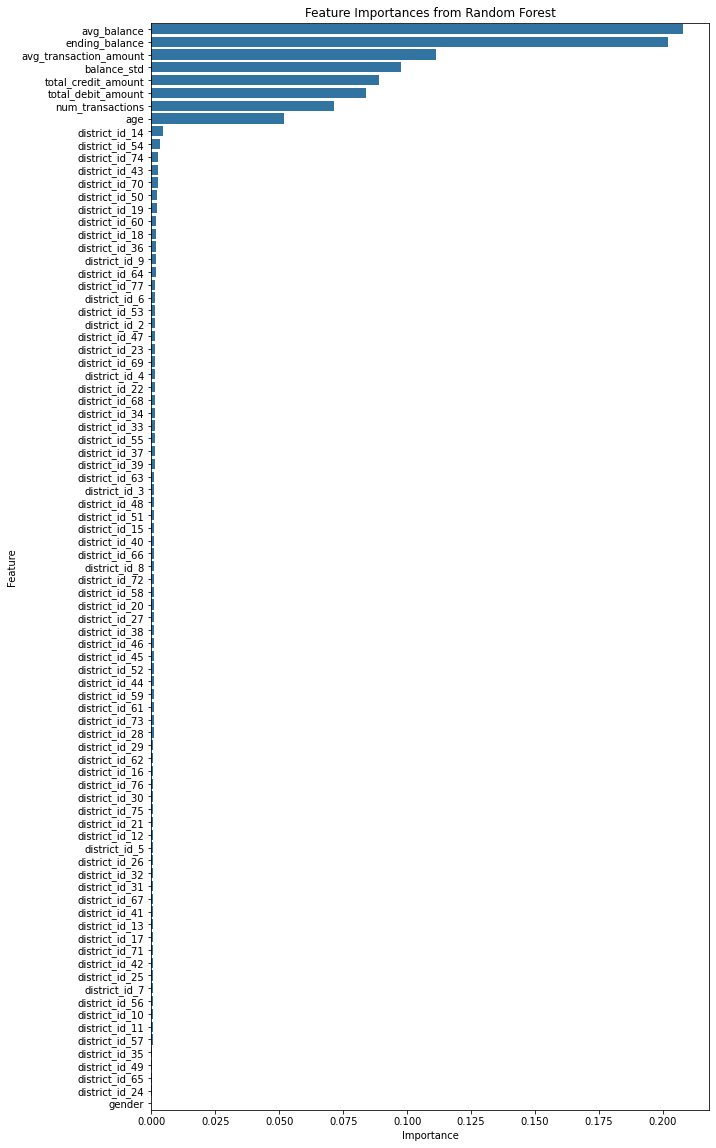

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 20))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()


In [ ]:
performance_summary = pd.DataFrame({
    'Model': ['Baseline Logistic Regression', 'Expanded Logistic Regression', 'Random Forest', 'Optimized Random Forest'],
    'Accuracy': [accuracy, accuracy_exp, accuracy_rf, accuracy_best_rf],
    'Precision': [precision, precision_exp, precision_rf, precision_best_rf],
    'Recall': [recall, recall_exp, recall_rf, recall_best_rf],
    'F1 Score': [f1, f1_exp, f1_rf, f1_best_rf],
    'ROC AUC': [roc_auc, roc_auc_exp, roc_auc_rf, roc_auc_best_rf]
})

print(performance_summary)


                          Model  Accuracy  Precision    Recall  F1 Score  \
0  Baseline Logistic Regression  0.855990   0.454545  0.178571  0.256410   
1  Expanded Logistic Regression  0.857852   0.477064  0.232143  0.312312   
2                 Random Forest  0.873991   0.596330  0.290179  0.390390   
3       Optimized Random Forest  0.875233   0.616162  0.272321  0.377709   

    ROC AUC  
0  0.879310  
1  0.885174  
2  0.906738  
3  0.911915  


# Model Comparison, Selection, and Optimization


## 13. Comparing Candidate Models and Identifying the Best Model Using ROC, AUC, and Precision


In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# Baseline Logistic Regression
baseline_metrics = {
    'Model': 'Baseline Logistic Regression',
    'ROC AUC': roc_auc_score(y_test, y_pred_proba),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}

# Expanded Logistic Regression
expanded_metrics = {
    'Model': 'Expanded Logistic Regression',
    'ROC AUC': roc_auc_score(y_test_exp, y_pred_proba_exp),
    'Precision': precision_score(y_test_exp, y_pred_exp),
    'Recall': recall_score(y_test_exp, y_pred_exp),
    'F1 Score': f1_score(y_test_exp, y_pred_exp)
}

# Random Forest
rf_metrics = {
    'Model': 'Random Forest',
    'ROC AUC': roc_auc_score(y_test_exp, y_pred_proba_rf),
    'Precision': precision_score(y_test_exp, y_pred_rf),
    'Recall': recall_score(y_test_exp, y_pred_rf),
    'F1 Score': f1_score(y_test_exp, y_pred_rf)
}

# Optimized Random Forest
opt_rf_metrics = {
    'Model': 'Optimized Random Forest',
    'ROC AUC': roc_auc_score(y_test_exp, y_pred_proba_best_rf),
    'Precision': precision_score(y_test_exp, y_pred_best_rf),
    'Recall': recall_score(y_test_exp, y_pred_best_rf),
    'F1 Score': f1_score(y_test_exp, y_pred_best_rf)
}

# Create a DataFrame for comparison
metrics_df = pd.DataFrame([baseline_metrics, expanded_metrics, rf_metrics, opt_rf_metrics])
print(metrics_df)


                          Model   ROC AUC  Precision    Recall  F1 Score
0  Baseline Logistic Regression  0.879310   0.454545  0.178571  0.256410
1  Expanded Logistic Regression  0.885174   0.477064  0.232143  0.312312
2                 Random Forest  0.906738   0.596330  0.290179  0.390390
3       Optimized Random Forest  0.911915   0.616162  0.272321  0.377709


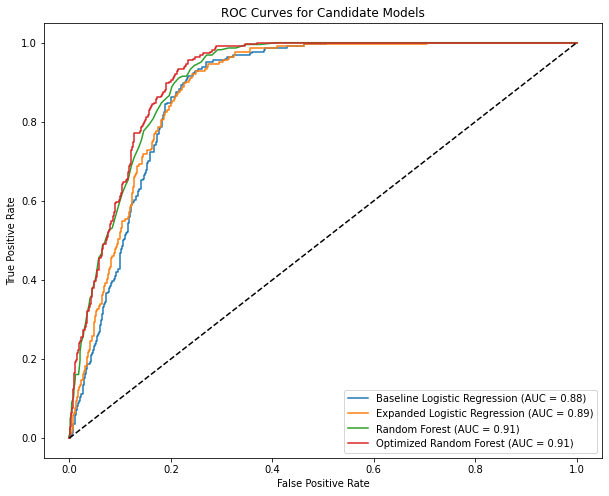

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Baseline Logistic Regression
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Baseline Logistic Regression (AUC = {:.2f})'.format(baseline_metrics['ROC AUC']))

# Expanded Logistic Regression
fpr_exp, tpr_exp, _ = roc_curve(y_test_exp, y_pred_proba_exp)
plt.plot(fpr_exp, tpr_exp, label='Expanded Logistic Regression (AUC = {:.2f})'.format(expanded_metrics['ROC AUC']))

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test_exp, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(rf_metrics['ROC AUC']))

# Optimized Random Forest
fpr_opt_rf, tpr_opt_rf, _ = roc_curve(y_test_exp, y_pred_proba_best_rf)
plt.plot(fpr_opt_rf, tpr_opt_rf, label='Optimized Random Forest (AUC = {:.2f})'.format(opt_rf_metrics['ROC AUC']))

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Candidate Models')
plt.legend(loc='lower right')
plt.show()


## 14. Quantitative Examination of Differences in Top-N Customer Lists of Different Models


In [ ]:
import pandas as pd

# Determine the number of top customers for 5% and 10%
N_5 = int(0.05 * len(X_test))
N_10 = int(0.10 * len(X_test))

# Create DataFrames with client IDs and predicted probabilities for each model
baseline_probs = pd.DataFrame({'client_id': X_test.index, 'probability': y_pred_proba})
expanded_probs = pd.DataFrame({'client_id': X_test.index, 'probability': y_pred_proba_exp})
rf_probs = pd.DataFrame({'client_id': X_test.index, 'probability': y_pred_proba_rf})
opt_rf_probs = pd.DataFrame({'client_id': X_test.index, 'probability': y_pred_proba_best_rf})

# Sort by probability (descending) and select top 5% and top 10%
top5_baseline = set(baseline_probs.sort_values('probability', ascending=False).head(N_5)['client_id'])
top5_expanded = set(expanded_probs.sort_values('probability', ascending=False).head(N_5)['client_id'])
top5_rf = set(rf_probs.sort_values('probability', ascending=False).head(N_5)['client_id'])
top5_opt_rf = set(opt_rf_probs.sort_values('probability', ascending=False).head(N_5)['client_id'])

top10_baseline = set(baseline_probs.sort_values('probability', ascending=False).head(N_10)['client_id'])
top10_expanded = set(expanded_probs.sort_values('probability', ascending=False).head(N_10)['client_id'])
top10_rf = set(rf_probs.sort_values('probability', ascending=False).head(N_10)['client_id'])
top10_opt_rf = set(opt_rf_probs.sort_values('probability', ascending=False).head(N_10)['client_id'])

# Calculate overlaps for top 5%
overlap_5_baseline_expanded = len(top5_baseline & top5_expanded)
overlap_5_baseline_rf = len(top5_baseline & top5_rf)
overlap_5_baseline_opt_rf = len(top5_baseline & top5_opt_rf)
overlap_5_expanded_rf = len(top5_expanded & top5_rf)
overlap_5_expanded_opt_rf = len(top5_expanded & top5_opt_rf)
overlap_5_rf_opt_rf = len(top5_rf & top5_opt_rf)

# Calculate overlaps for top 10%
overlap_10_baseline_expanded = len(top10_baseline & top10_expanded)
overlap_10_baseline_rf = len(top10_baseline & top10_rf)
overlap_10_baseline_opt_rf = len(top10_baseline & top10_opt_rf)
overlap_10_expanded_rf = len(top10_expanded & top10_rf)
overlap_10_expanded_opt_rf = len(top10_expanded & top10_opt_rf)
overlap_10_rf_opt_rf = len(top10_rf & top10_opt_rf)

# Display overlaps
print("Top 5% Overlaps:")
print(f'Overlap between Baseline and Expanded Logistic Regression (Top 5%): {overlap_5_baseline_expanded}')
print(f'Overlap between Baseline and Random Forest (Top 5%): {overlap_5_baseline_rf}')
print(f'Overlap between Baseline and Optimized Random Forest (Top 5%): {overlap_5_baseline_opt_rf}')
print(f'Overlap between Expanded Logistic Regression and Random Forest (Top 5%): {overlap_5_expanded_rf}')
print(f'Overlap between Expanded Logistic Regression and Optimized Random Forest (Top 5%): {overlap_5_expanded_opt_rf}')
print(f'Overlap between Random Forest and Optimized Random Forest (Top 5%): {overlap_5_rf_opt_rf}')

print("\nTop 10% Overlaps:")
print(f'Overlap between Baseline and Expanded Logistic Regression (Top 10%): {overlap_10_baseline_expanded}')
print(f'Overlap between Baseline and Random Forest (Top 10%): {overlap_10_baseline_rf}')
print(f'Overlap between Baseline and Optimized Random Forest (Top 10%): {overlap_10_baseline_opt_rf}')
print(f'Overlap between Expanded Logistic Regression and Random Forest (Top 10%): {overlap_10_expanded_rf}')
print(f'Overlap between Expanded Logistic Regression and Optimized Random Forest (Top 10%): {overlap_10_expanded_opt_rf}')
print(f'Overlap between Random Forest and Optimized Random Forest (Top 10%): {overlap_10_rf_opt_rf}')


Top 5% Overlaps:
Overlap between Baseline and Expanded Logistic Regression (Top 5%): 58
Overlap between Baseline and Random Forest (Top 5%): 19
Overlap between Baseline and Optimized Random Forest (Top 5%): 17
Overlap between Expanded Logistic Regression and Random Forest (Top 5%): 23
Overlap between Expanded Logistic Regression and Optimized Random Forest (Top 5%): 26
Overlap between Random Forest and Optimized Random Forest (Top 5%): 64

Top 10% Overlaps:
Overlap between Baseline and Expanded Logistic Regression (Top 10%): 122
Overlap between Baseline and Random Forest (Top 10%): 69
Overlap between Baseline and Optimized Random Forest (Top 10%): 71
Overlap between Expanded Logistic Regression and Random Forest (Top 10%): 85
Overlap between Expanded Logistic Regression and Optimized Random Forest (Top 10%): 89
Overlap between Random Forest and Optimized Random Forest (Top 10%): 137


## 15. Optimizing the Best Candidate Model Regarding Hyperparameter Settings


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter distributions
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(range(10, 51, 10)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True, False]
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

# Fit to the training data
random_search.fit(X_train_exp, y_train_exp)

# Best parameters found
print("Best parameters found:")
print(random_search.best_params_)

# Best estimator
best_model = random_search.best_estimator_


Best parameters found:
{'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 7, 'min_samples_split': 9, 'n_estimators': 472}


In [ ]:
# Predictions on the test set
y_pred_best = best_model.predict(X_test_exp)
y_pred_proba_best = best_model.predict_proba(X_test_exp)[:, 1]

# Calculate evaluation metrics
best_metrics = {
    'Model': 'Further Optimized Random Forest',
    'ROC AUC': roc_auc_score(y_test_exp, y_pred_proba_best),
    'Precision': precision_score(y_test_exp, y_pred_best),
    'Recall': recall_score(y_test_exp, y_pred_best),
    'F1 Score': f1_score(y_test_exp, y_pred_best)
}

print("Further Optimized Random Forest Model Performance:")
print(best_metrics)


Further Optimized Random Forest Model Performance:
{'Model': 'Further Optimized Random Forest', 'ROC AUC': 0.913694767741271, 'Precision': 0.6712328767123288, 'Recall': 0.21875, 'F1 Score': 0.32996632996632996}


In [ ]:
new_row = pd.DataFrame([best_metrics])

metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

print(metrics_df)


                             Model   ROC AUC  Precision    Recall  F1 Score
0     Baseline Logistic Regression  0.879310   0.454545  0.178571  0.256410
1     Expanded Logistic Regression  0.885174   0.477064  0.232143  0.312312
2                    Random Forest  0.906738   0.596330  0.290179  0.390390
3          Optimized Random Forest  0.911915   0.616162  0.272321  0.377709
4  Further Optimized Random Forest  0.913695   0.671233  0.218750  0.329966


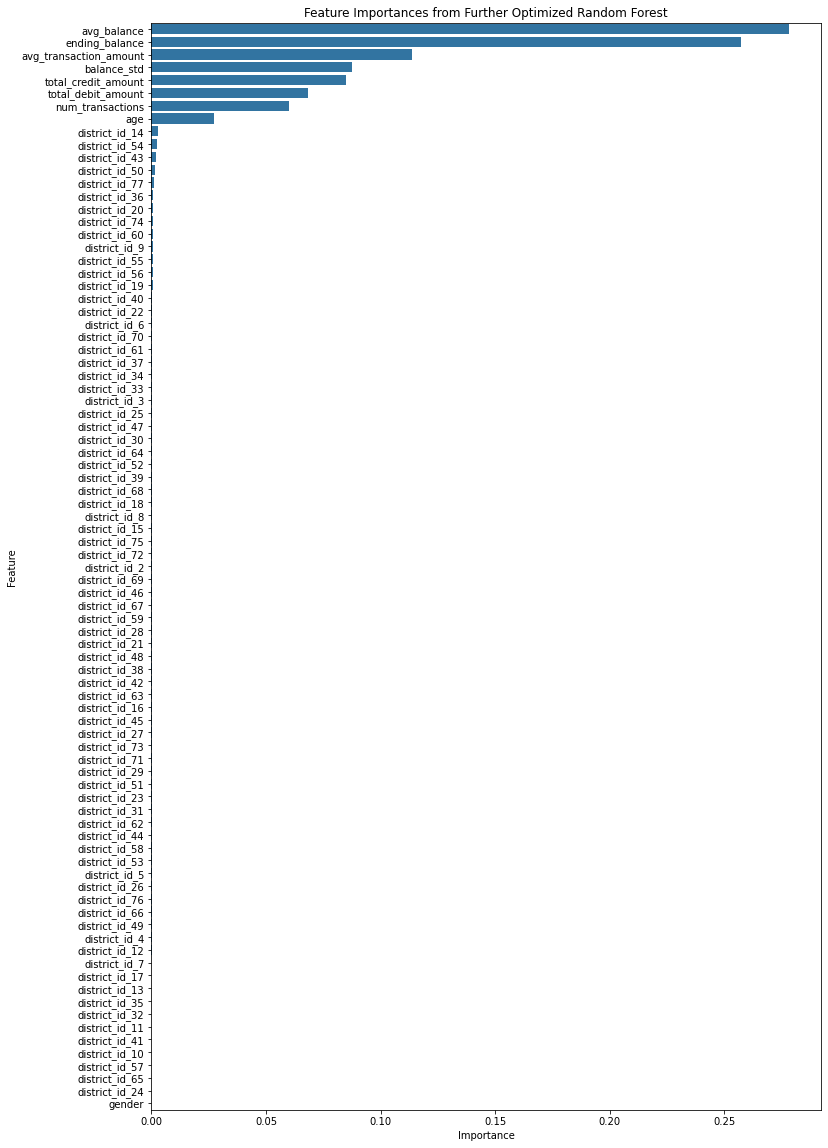

In [ ]:
# Feature importances
importances = best_model.feature_importances_
feature_names = X_train_exp.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(12, 20))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Further Optimized Random Forest')
plt.show()


# Model Explanation and Reduction


## 16. Examining Global Feature Importance and Model Reduction


In [ ]:
# Extract feature importances from the best model
importances = best_model.feature_importances_
feature_names = X_train_exp.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance
importance_df.sort_values(by='Importance', ascending=False, inplace=True)


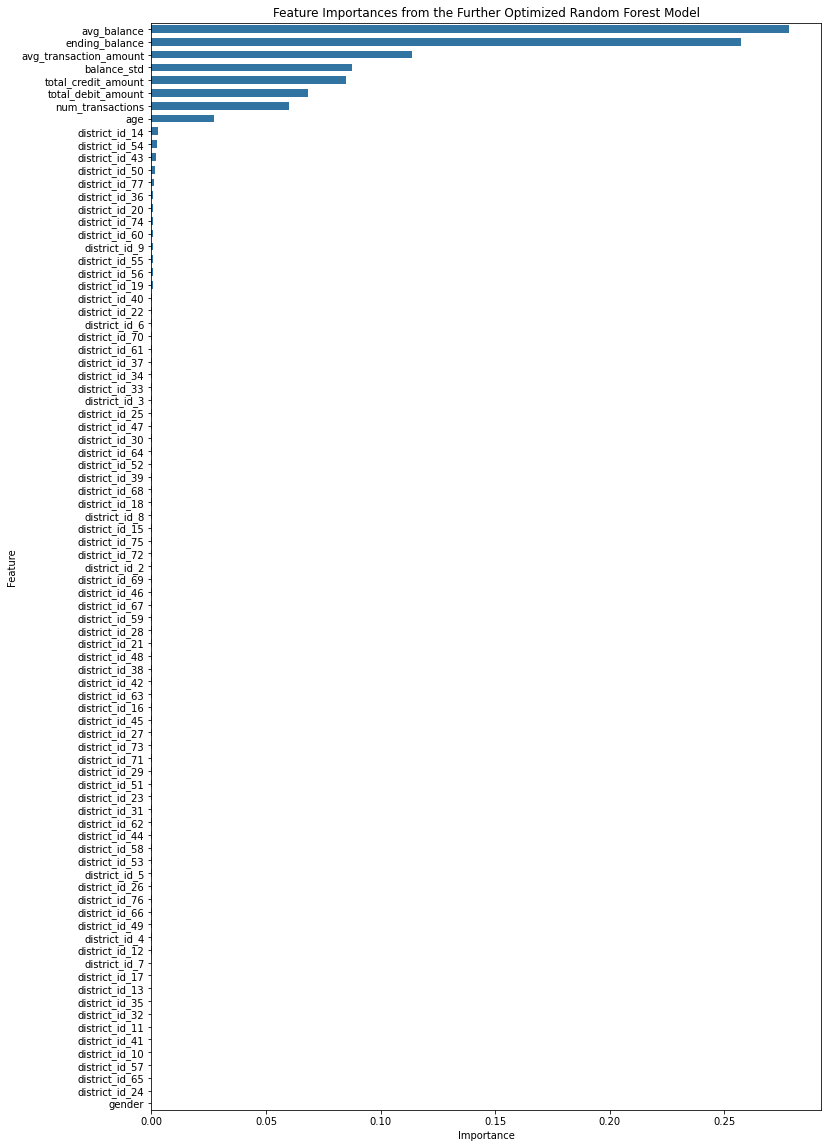

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 20))
sns.barplot(x='Importance', y='Feature', data=importance_df, linewidth=5, width=0.6)
plt.title('Feature Importances from the Further Optimized Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Adjust the spacing between y-axis labels
plt.yticks(ticks=range(len(importance_df)), labels=importance_df['Feature'], rotation=0, fontsize=10)

plt.show()

In [ ]:
# Select top N features
N = 5
top_features = importance_df['Feature'].head(N).tolist()
print(f"Top {N} features: {top_features}")


Top 5 features: ['avg_balance', 'ending_balance', 'avg_transaction_amount', 'balance_std', 'total_credit_amount']


In [ ]:
# Prepare the dataset with only top features
X_train_reduced = X_train_exp[top_features]
X_test_reduced = X_test_exp[top_features]

# Retrain the model
best_model_reduced = RandomForestClassifier(random_state=42, **random_search.best_params_)
best_model_reduced.fit(X_train_reduced, y_train_exp)

# Evaluate the reduced model
y_pred_reduced = best_model_reduced.predict(X_test_reduced)
y_pred_proba_reduced = best_model_reduced.predict_proba(X_test_reduced)[:, 1]

# Calculate evaluation metrics
reduced_metrics = {
    'Model': 'Reduced Optimized Random Forest',
    'ROC AUC': roc_auc_score(y_test_exp, y_pred_proba_reduced),
    'Precision': precision_score(y_test_exp, y_pred_reduced),
    'Recall': recall_score(y_test_exp, y_pred_reduced),
    'F1 Score': f1_score(y_test_exp, y_pred_reduced)
}

print("Reduced Optimized Random Forest Model Performance:")
print(reduced_metrics)


Reduced Optimized Random Forest Model Performance:
{'Model': 'Reduced Optimized Random Forest', 'ROC AUC': 0.9041192450303842, 'Precision': 0.5813953488372093, 'Recall': 0.33482142857142855, 'F1 Score': 0.424929178470255}


In [ ]:
new_row = pd.DataFrame([reduced_metrics])

metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)
print(metrics_df)


                             Model   ROC AUC  Precision    Recall  F1 Score
0     Baseline Logistic Regression  0.879310   0.454545  0.178571  0.256410
1     Expanded Logistic Regression  0.885174   0.477064  0.232143  0.312312
2                    Random Forest  0.906738   0.596330  0.290179  0.390390
3          Optimized Random Forest  0.911915   0.616162  0.272321  0.377709
4  Further Optimized Random Forest  0.913695   0.671233  0.218750  0.329966
5  Reduced Optimized Random Forest  0.904119   0.581395  0.334821  0.424929


In [ ]:
# Function to evaluate model with varying number of top features
def evaluate_model_with_top_features(num_features):
    selected_features = importance_df['Feature'].head(num_features).tolist()
    X_train_subset = X_train_exp[selected_features]
    X_test_subset = X_test_exp[selected_features]
    
    model = RandomForestClassifier(random_state=42, **random_search.best_params_)
    model.fit(X_train_subset, y_train_exp)
    
    y_pred = model.predict(X_test_subset)
    y_pred_proba = model.predict_proba(X_test_subset)[:, 1]
    
    roc_auc = roc_auc_score(y_test_exp, y_pred_proba)
    precision = precision_score(y_test_exp, y_pred)
    recall = recall_score(y_test_exp, y_pred)
    f1 = f1_score(y_test_exp, y_pred)
    
    return {'Num_Features': num_features, 'ROC AUC': roc_auc, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Evaluate models with varying number of top features
results = []
for n in range(1, len(feature_names)+1):
    result = evaluate_model_with_top_features(n)
    results.append(result)

# Create DataFrame of results
reduction_results = pd.DataFrame(results)


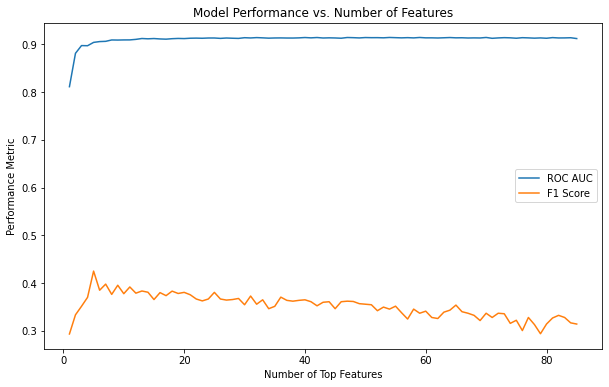

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(reduction_results['Num_Features'], reduction_results['ROC AUC'], label='ROC AUC')
plt.plot(reduction_results['Num_Features'], reduction_results['F1 Score'], label='F1 Score')
plt.xlabel('Number of Top Features')
plt.ylabel('Performance Metric')
plt.title('Model Performance vs. Number of Features')
plt.legend()
plt.show()


## 17. Describing the Added Value of the Final Model in Practice


- The must not be juniors cards 
- new features creations
- balance databset (new reference data)